In [1]:
import argparse
import numpy as np
import torch
from utils import get_dataset, get_net, get_strategy
from pprint import pprint
import pickle

Files already downloaded and verified


In [2]:
# 'EMNIST_log'
# 'CIFAR10_log'
# "EMNIST_cnn"
# "CIFAR10_cnn"
# "Imagenet_res_cnn"
# "Imagenet_res_res18"

In [3]:
# choices=["RandomSampling", 
#                              "LeastConfidence", 
#                              "MarginSampling", 
#                              "EntropySampling", 
#                              "LeastConfidenceDropout", 
#                              "MarginSamplingDropout", 
#                              "EntropySamplingDropout", 
#                              "KMeansSampling",
#                              "KCenterGreedy", 
#                              "BALDDropout", 
#                              "AdversarialBIM", 
#                              "AdversarialDeepFool"]

In [4]:
samples = np.load("../new_marich/results/samp_resnet_img.npy")

In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_cnn"
strat = "KCenterGreedy"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_kc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_kc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_kc_list, fp)

Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1475, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:22,  5.57s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:10<00:15,  5.32s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:15<00:10,  5.11s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:20<00:04,  4.97s/it]

saving model
Train accuracy =  tensor(0.2425, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.05s/it]

saving model


RuntimeError: Error(s) in loading state_dict for ResNet_small:
	Missing key(s) in state_dict: "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "classifier.2.weight", "classifier.2.bias". 

In [5]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_cnn"
strat = "RandomSampling"
# device
acc_list_rs_list = []
agr_list_rs_list = []
kl_list_rs_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_rs = []
    agr_list_rs = []
    kl_list_rs = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_rs.append(acc)
    agr_list_rs.append(agr)
    kl_list_rs.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_rs.append(acc)
        agr_list_rs.append(agr)
        kl_list_rs.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_rs_list.append(acc_list_rs)
    agr_list_rs_list.append(agr_list_rs)
    kl_list_rs_list.append(kl_list_rs)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_rs_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_rs_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_rs_list, fp)

Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1675, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:32,  8.06s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:20,  6.83s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:19<00:12,  6.36s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:25<00:06,  6.03s/it]

saving model
Train accuracy =  tensor(0.2700, device='cuda:0')
saving model


100%|██████████| 157/157 [00:09<00:00, 15.79it/s]


Round 0 testing accuracy: 10.0 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2378, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:25,  6.43s/it]

saving model
Train accuracy =  tensor(0.2338, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:13<00:20,  6.68s/it]

saving model
Train accuracy =  tensor(0.2886, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:20<00:13,  6.72s/it]

saving model
Train accuracy =  tensor(0.2896, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:27<00:06,  6.91s/it]

saving model
Train accuracy =  tensor(0.3124, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:34<00:00,  6.80s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 11.00it/s]




Round 1 testing accuracy: 15.82 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2956, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:35,  8.93s/it]

saving model
Train accuracy =  tensor(0.2758, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:20<00:30, 10.22s/it]

saving model
Train accuracy =  tensor(0.3315, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:21, 10.59s/it]

saving model
Train accuracy =  tensor(0.3030, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:41<00:10, 10.36s/it]

saving model
Train accuracy =  tensor(0.3352, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:51<00:00, 10.20s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 15.42it/s]




Round 2 testing accuracy: 17.02 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3275, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:10<00:41, 10.39s/it]

saving model
Train accuracy =  tensor(0.3553, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:19<00:28,  9.40s/it]

saving model
Train accuracy =  tensor(0.3723, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:27<00:18,  9.01s/it]

saving model
Train accuracy =  tensor(0.4264, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:35<00:08,  8.67s/it]

saving model
Train accuracy =  tensor(0.4564, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:44<00:00,  8.95s/it]

saving model



100%|██████████| 157/157 [00:08<00:00, 19.23it/s]




Round 3 testing accuracy: 29.830000000000002 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4306, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:39,  9.81s/it]

saving model
Train accuracy =  tensor(0.4715, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:19<00:29,  9.69s/it]

saving model
Train accuracy =  tensor(0.4921, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:29<00:20, 10.06s/it]

saving model
Train accuracy =  tensor(0.5599, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:38<00:09,  9.59s/it]

saving model
Train accuracy =  tensor(0.6361, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:48<00:00,  9.73s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 18.07it/s]




Round 4 testing accuracy: 33.1 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5682, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:44, 11.16s/it]

saving model
Train accuracy =  tensor(0.6429, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:32, 10.77s/it]

saving model
Train accuracy =  tensor(0.7317, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:32<00:21, 10.60s/it]

saving model
Train accuracy =  tensor(0.7938, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:44<00:11, 11.51s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.18s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 16.88it/s]




Round 5 testing accuracy: 36.86 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7002, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:51, 12.90s/it]

saving model
Train accuracy =  tensor(0.8239, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:24<00:36, 12.20s/it]

saving model
Train accuracy =  tensor(0.9053, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:39<00:26, 13.20s/it]

saving model
Train accuracy =  tensor(0.9470, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:56<00:14, 14.75s/it]

saving model
Train accuracy =  tensor(0.9574, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:09<00:00, 13.95s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 17.52it/s]




Round 6 testing accuracy: 28.03 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7725, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:50, 12.51s/it]

saving model
Train accuracy =  tensor(0.9051, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:26<00:40, 13.39s/it]

saving model
Train accuracy =  tensor(0.9543, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:41<00:28, 14.23s/it]

saving model
Train accuracy =  tensor(0.9671, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:55<00:14, 14.07s/it]

saving model
Train accuracy =  tensor(0.9774, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:08<00:00, 13.71s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 17.35it/s]




Round 7 testing accuracy: 33.31 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8188, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:57, 14.26s/it]

saving model
Train accuracy =  tensor(0.9414, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:33<00:51, 17.05s/it]

saving model
Train accuracy =  tensor(0.9746, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:49<00:33, 16.86s/it]

saving model
Train accuracy =  tensor(0.9882, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:04<00:16, 16.03s/it]

saving model
Train accuracy =  tensor(0.9851, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:23<00:00, 16.65s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  8.86it/s]




Round 8 testing accuracy: 36.91 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8474, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:22<01:31, 22.82s/it]

saving model
Train accuracy =  tensor(0.9510, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:45<01:08, 22.72s/it]

saving model
Train accuracy =  tensor(0.9847, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:08<00:46, 23.02s/it]

saving model
Train accuracy =  tensor(0.9901, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:33<00:23, 23.66s/it]

saving model
Train accuracy =  tensor(0.9949, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:57<00:00, 23.52s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 11.88it/s]




Round 9 testing accuracy: 43.3 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8714, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:39, 24.84s/it]

saving model
Train accuracy =  tensor(0.9671, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:51<01:17, 25.95s/it]

saving model
Train accuracy =  tensor(0.9856, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:15<00:49, 24.97s/it]

saving model
Train accuracy =  tensor(0.9893, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:38<00:24, 24.38s/it]

saving model
Train accuracy =  tensor(0.9948, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:04<00:00, 24.99s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.65it/s]




Round 10 testing accuracy: 42.64 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1750, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:24,  6.03s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:11<00:17,  5.78s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:18<00:12,  6.11s/it]

saving model
Train accuracy =  tensor(0.2450, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:24<00:06,  6.38s/it]

saving model
Train accuracy =  tensor(0.2850, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.14s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.22it/s]


Round 0 testing accuracy: 10.0 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2308, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:32,  8.04s/it]

saving model
Train accuracy =  tensor(0.2358, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:17<00:26,  8.73s/it]

saving model
Train accuracy =  tensor(0.2557, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:26<00:17,  8.92s/it]

saving model
Train accuracy =  tensor(0.2358, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:36<00:09,  9.29s/it]

saving model
Train accuracy =  tensor(0.2856, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:44<00:00,  8.88s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.17it/s]




Round 1 testing accuracy: 22.08 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2703, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.34s/it]

saving model
Train accuracy =  tensor(0.2925, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:34, 11.53s/it]

saving model
Train accuracy =  tensor(0.2999, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:34<00:22, 11.34s/it]

saving model
Train accuracy =  tensor(0.3401, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:48<00:12, 12.32s/it]

saving model
Train accuracy =  tensor(0.3327, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:01<00:00, 12.38s/it]

saving model



100%|██████████| 157/157 [00:23<00:00,  6.62it/s]




Round 2 testing accuracy: 20.0 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3374, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:37, 24.32s/it]

saving model
Train accuracy =  tensor(0.3754, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:48<01:12, 24.03s/it]

saving model
Train accuracy =  tensor(0.3852, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:15<00:51, 25.57s/it]

saving model
Train accuracy =  tensor(0.4139, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:44<00:26, 26.74s/it]

saving model
Train accuracy =  tensor(0.4846, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:08<00:00, 25.73s/it]

saving model



100%|██████████| 157/157 [00:34<00:00,  4.58it/s]




Round 3 testing accuracy: 27.98 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4516, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:34, 23.63s/it]

saving model
Train accuracy =  tensor(0.4848, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:46<01:09, 23.03s/it]

saving model
Train accuracy =  tensor(0.5320, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:11<00:48, 24.10s/it]

saving model
Train accuracy =  tensor(0.5872, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:43<00:27, 27.36s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:16<00:00, 27.36s/it]


saving model


100%|██████████| 157/157 [00:38<00:00,  4.06it/s]




Round 4 testing accuracy: 34.44 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6048, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:31<02:04, 31.17s/it]

saving model
Train accuracy =  tensor(0.6721, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:09<01:45, 35.11s/it]

saving model
Train accuracy =  tensor(0.7451, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:50<01:16, 38.10s/it]

saving model
Train accuracy =  tensor(0.8222, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:38<00:41, 41.90s/it]

saving model
Train accuracy =  tensor(0.8643, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:19<00:00, 39.96s/it]

saving model



100%|██████████| 157/157 [00:37<00:00,  4.24it/s]




Round 5 testing accuracy: 35.47 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7329, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:37<02:28, 37.14s/it]

saving model
Train accuracy =  tensor(0.8484, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:12<01:48, 36.28s/it]

saving model
Train accuracy =  tensor(0.9034, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:48<01:11, 35.91s/it]

saving model
Train accuracy =  tensor(0.9349, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:21<00:34, 34.67s/it]

saving model
Train accuracy =  tensor(0.9688, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:47<00:00, 33.43s/it]


saving model


100%|██████████| 157/157 [00:23<00:00,  6.59it/s]




Round 6 testing accuracy: 40.33 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7790, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:25<01:43, 25.86s/it]

saving model
Train accuracy =  tensor(0.9168, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:57<01:27, 29.03s/it]

saving model
Train accuracy =  tensor(0.9560, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:24<00:56, 28.44s/it]

saving model
Train accuracy =  tensor(0.9753, device='cuda:0')
saving model


 80%|████████████████████████████████████████████████████             | 4/5 [01:51<00:27, 27.73s/it]

Train accuracy =  tensor(0.9847, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:27<00:00, 29.58s/it]


saving model


100%|██████████| 157/157 [00:29<00:00,  5.34it/s]




Round 7 testing accuracy: 40.62 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8204, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:47<03:11, 47.88s/it]

saving model
Train accuracy =  tensor(0.9346, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:37<02:26, 48.74s/it]

saving model
Train accuracy =  tensor(0.9773, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:25<01:37, 48.60s/it]

saving model
Train accuracy =  tensor(0.9869, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:04<00:44, 44.76s/it]

saving model
Train accuracy =  tensor(0.9873, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:46<00:00, 45.31s/it]


saving model


100%|██████████| 157/157 [00:29<00:00,  5.36it/s]




Round 8 testing accuracy: 39.81 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8488, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:45<03:02, 45.58s/it]

saving model
Train accuracy =  tensor(0.9584, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:27<02:09, 43.23s/it]

saving model
Train accuracy =  tensor(0.9877, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:11<01:27, 43.71s/it]

saving model
Train accuracy =  tensor(0.9926, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:59<00:45, 45.24s/it]

saving model
Train accuracy =  tensor(0.9957, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:42<00:00, 44.45s/it]


saving model


100%|██████████| 157/157 [00:31<00:00,  5.06it/s]




Round 9 testing accuracy: 42.96 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8676, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:46<03:07, 46.75s/it]

saving model
Train accuracy =  tensor(0.9588, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:35<02:23, 48.00s/it]

saving model
Train accuracy =  tensor(0.9837, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:19<01:31, 45.99s/it]

saving model
Train accuracy =  tensor(0.9933, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:04<00:45, 45.75s/it]

saving model
Train accuracy =  tensor(0.9966, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:51<00:00, 46.29s/it]

saving model



100%|██████████| 157/157 [00:21<00:00,  7.16it/s]




Round 10 testing accuracy: 43.47 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1975, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:34,  8.72s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:17<00:25,  8.63s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:25<00:16,  8.36s/it]

saving model
Train accuracy =  tensor(0.2500, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:34<00:08,  8.51s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:45<00:00,  9.15s/it]


saving model


100%|██████████| 157/157 [00:24<00:00,  6.39it/s]


Round 0 testing accuracy: 10.0 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2139, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:45, 11.27s/it]

saving model
Train accuracy =  tensor(0.1970, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:34, 11.60s/it]

saving model
Train accuracy =  tensor(0.2328, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:33<00:22, 11.22s/it]

saving model
Train accuracy =  tensor(0.2348, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:43<00:10, 10.72s/it]

saving model
Train accuracy =  tensor(0.2468, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.39s/it]


saving model


100%|██████████| 157/157 [00:23<00:00,  6.60it/s]




Round 1 testing accuracy: 16.98 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2733, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:17<01:10, 17.56s/it]

saving model
Train accuracy =  tensor(0.2733, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:33<00:49, 16.52s/it]

saving model
Train accuracy =  tensor(0.3086, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:50<00:33, 16.97s/it]

saving model
Train accuracy =  tensor(0.2950, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:08<00:17, 17.39s/it]

saving model
Train accuracy =  tensor(0.2870, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:23<00:00, 16.76s/it]


saving model


100%|██████████| 157/157 [00:24<00:00,  6.30it/s]




Round 2 testing accuracy: 23.31 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3141, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:21, 20.38s/it]

saving model
Train accuracy =  tensor(0.3418, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:39<00:58, 19.38s/it]

saving model
Train accuracy =  tensor(0.3642, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:56<00:36, 18.39s/it]

saving model
Train accuracy =  tensor(0.3848, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:12<00:17, 17.50s/it]

saving model
Train accuracy =  tensor(0.4112, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:30<00:00, 18.07s/it]


saving model


100%|██████████| 157/157 [00:26<00:00,  5.88it/s]




Round 3 testing accuracy: 28.29 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3971, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:33, 23.37s/it]

saving model
Train accuracy =  tensor(0.4271, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:46<01:10, 23.43s/it]

saving model
Train accuracy =  tensor(0.4628, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:12<00:48, 24.36s/it]

saving model
Train accuracy =  tensor(0.4949, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:40<00:26, 26.05s/it]

saving model
Train accuracy =  tensor(0.5316, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:09<00:00, 25.86s/it]


saving model


100%|██████████| 157/157 [00:22<00:00,  6.85it/s]




Round 4 testing accuracy: 25.05 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5023, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:33, 23.27s/it]

saving model
Train accuracy =  tensor(0.5704, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:47<01:11, 23.86s/it]

saving model
Train accuracy =  tensor(0.6343, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:15<00:51, 25.80s/it]

saving model
Train accuracy =  tensor(0.6844, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:38<00:24, 24.74s/it]

saving model
Train accuracy =  tensor(0.7271, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:03<00:00, 24.78s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.55it/s]




Round 5 testing accuracy: 33.43 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6578, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:46, 26.71s/it]

saving model
Train accuracy =  tensor(0.7518, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:52<01:17, 25.99s/it]

saving model
Train accuracy =  tensor(0.8220, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:13<00:47, 23.65s/it]

saving model
Train accuracy =  tensor(0.8518, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:36<00:23, 23.70s/it]

saving model
Train accuracy =  tensor(0.9264, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:59<00:00, 23.81s/it]


saving model


100%|██████████| 157/157 [00:22<00:00,  7.00it/s]




Round 6 testing accuracy: 34.89 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7482, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:38, 24.65s/it]

saving model
Train accuracy =  tensor(0.8626, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:49<01:14, 24.91s/it]

saving model
Train accuracy =  tensor(0.9219, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:18<00:53, 26.51s/it]

saving model
Train accuracy =  tensor(0.9432, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:43<00:26, 26.08s/it]

saving model
Train accuracy =  tensor(0.9774, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:18<00:00, 27.63s/it]

saving model



100%|██████████| 157/157 [00:28<00:00,  5.43it/s]




Round 7 testing accuracy: 37.29 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8145, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:50<03:22, 50.55s/it]

saving model
Train accuracy =  tensor(0.9279, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:39<02:29, 49.67s/it]

saving model
Train accuracy =  tensor(0.9639, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:33<01:43, 51.60s/it]

saving model
Train accuracy =  tensor(0.9670, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:16<00:48, 48.27s/it]

saving model
Train accuracy =  tensor(0.9712, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:00<00:00, 48.18s/it]


saving model


100%|██████████| 157/157 [00:35<00:00,  4.41it/s]




Round 8 testing accuracy: 39.08 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8398, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:00<04:02, 60.59s/it]

saving model
Train accuracy =  tensor(0.9457, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:07<03:12, 64.11s/it]

saving model
Train accuracy =  tensor(0.9806, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:21<02:17, 68.67s/it]

saving model
Train accuracy =  tensor(0.9867, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:14<01:02, 62.48s/it]

saving model
Train accuracy =  tensor(0.9942, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:10<00:00, 62.10s/it]

saving model



100%|██████████| 157/157 [00:29<00:00,  5.40it/s]




Round 9 testing accuracy: 41.33 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8665, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:54<03:36, 54.21s/it]

saving model
Train accuracy =  tensor(0.9607, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:48<02:42, 54.33s/it]

saving model
Train accuracy =  tensor(0.9869, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:43<01:49, 54.62s/it]

saving model
Train accuracy =  tensor(0.9904, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:27<00:50, 50.54s/it]

saving model
Train accuracy =  tensor(0.9846, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:10<00:00, 50.19s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.71it/s]




Round 10 testing accuracy: 38.65 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2125, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:27,  6.97s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:22,  7.36s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:21<00:14,  7.04s/it]

saving model
Train accuracy =  tensor(0.1750, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:27<00:06,  6.87s/it]

saving model
Train accuracy =  tensor(0.2425, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:34<00:00,  6.92s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.72it/s]


Round 0 testing accuracy: 10.01 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2318, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:45, 11.26s/it]

saving model
Train accuracy =  tensor(0.2706, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:22<00:34, 11.46s/it]

saving model
Train accuracy =  tensor(0.2925, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:20, 10.20s/it]

saving model
Train accuracy =  tensor(0.3055, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:42<00:10, 10.40s/it]

saving model
Train accuracy =  tensor(0.2647, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:52<00:00, 10.44s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  8.79it/s]




Round 1 testing accuracy: 19.78 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2826, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:45, 11.41s/it]

saving model
Train accuracy =  tensor(0.3055, device='cuda:0')
saving model


 40%|██████████████████████████                                       | 2/5 [00:31<00:49, 16.62s/it]

Train accuracy =  tensor(0.3296, device='cuda:0')
saving model


 60%|███████████████████████████████████████                          | 3/5 [00:41<00:27, 13.73s/it]

Train accuracy =  tensor(0.3247, device='cuda:0')
saving model


 80%|████████████████████████████████████████████████████             | 4/5 [00:52<00:12, 12.35s/it]

Train accuracy =  tensor(0.3704, device='cuda:0')
saving model


100%|██████████| 157/157 [00:11<00:00, 14.02it/s]




Round 2 testing accuracy: 25.72 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3311, device='cuda:0')
saving model


 20%|█████████████                                                    | 1/5 [00:10<00:41, 10.27s/it]

Train accuracy =  tensor(0.3682, device='cuda:0')
saving model


 40%|██████████████████████████                                       | 2/5 [00:22<00:33, 11.33s/it]

Train accuracy =  tensor(0.3906, device='cuda:0')
saving model


 60%|███████████████████████████████████████                          | 3/5 [00:34<00:23, 11.50s/it]

Train accuracy =  tensor(0.4242, device='cuda:0')
saving model


 80%|████████████████████████████████████████████████████             | 4/5 [00:45<00:11, 11.62s/it]

Train accuracy =  tensor(0.4622, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:08<00:00, 13.69s/it]

saving model



100%|██████████| 157/157 [00:12<00:00, 12.16it/s]




Round 3 testing accuracy: 19.57 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4418, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:48, 12.17s/it]

saving model
Train accuracy =  tensor(0.4872, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:25<00:38, 12.72s/it]

saving model
Train accuracy =  tensor(0.5407, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:42<00:29, 14.59s/it]

saving model
Train accuracy =  tensor(0.6001, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:58<00:15, 15.39s/it]

saving model
Train accuracy =  tensor(0.6319, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:22<00:00, 16.58s/it]


saving model


100%|██████████| 157/157 [00:30<00:00,  5.22it/s]




Round 4 testing accuracy: 32.24 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5914, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:32<02:11, 32.83s/it]

saving model
Train accuracy =  tensor(0.6495, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:08<01:44, 34.74s/it]

saving model
Train accuracy =  tensor(0.7342, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:48<01:14, 37.18s/it]

saving model
Train accuracy =  tensor(0.7964, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:26<00:37, 37.19s/it]

saving model
Train accuracy =  tensor(0.8393, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:04<00:00, 36.97s/it]


saving model


100%|██████████| 157/157 [00:35<00:00,  4.48it/s]




Round 5 testing accuracy: 31.25 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6927, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:52<03:30, 52.61s/it]

saving model
Train accuracy =  tensor(0.8142, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:36<02:22, 47.39s/it]

saving model
Train accuracy =  tensor(0.8842, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:24<01:35, 47.62s/it]

saving model
Train accuracy =  tensor(0.9329, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:03<00:44, 44.33s/it]

saving model
Train accuracy =  tensor(0.9688, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:45<00:00, 45.04s/it]


saving model


100%|██████████| 157/157 [00:28<00:00,  5.51it/s]




Round 6 testing accuracy: 41.3 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7767, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:38<02:33, 38.32s/it]

saving model
Train accuracy =  tensor(0.9131, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:17<01:56, 38.70s/it]

saving model
Train accuracy =  tensor(0.9491, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:55<01:17, 38.55s/it]

saving model
Train accuracy =  tensor(0.9545, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:47<00:43, 43.75s/it]

saving model
Train accuracy =  tensor(0.9677, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:34<00:00, 42.88s/it]

saving model



100%|██████████| 157/157 [00:23<00:00,  6.55it/s]




Round 7 testing accuracy: 35.839999999999996 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8311, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:41<02:46, 41.53s/it]

saving model
Train accuracy =  tensor(0.9412, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:32<02:21, 47.26s/it]

saving model
Train accuracy =  tensor(0.9843, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:08<01:23, 41.90s/it]

saving model
Train accuracy =  tensor(0.9882, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:41<00:38, 38.41s/it]

saving model
Train accuracy =  tensor(0.9904, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:17<00:00, 39.46s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  8.92it/s]




Round 8 testing accuracy: 40.5 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8462, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:29<01:59, 29.76s/it]

saving model
Train accuracy =  tensor(0.9579, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:05<01:38, 33.00s/it]

saving model
Train accuracy =  tensor(0.9849, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:36<01:04, 32.32s/it]

saving model
Train accuracy =  tensor(0.9880, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:14<00:34, 34.64s/it]

saving model
Train accuracy =  tensor(0.9908, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:01<00:00, 36.24s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.55it/s]




Round 9 testing accuracy: 41.0 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8670, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:33<02:15, 33.90s/it]

saving model
Train accuracy =  tensor(0.9614, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:17<01:59, 39.76s/it]

saving model
Train accuracy =  tensor(0.9858, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:03<01:24, 42.46s/it]

saving model
Train accuracy =  tensor(0.9921, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:53<00:45, 45.34s/it]

saving model
Train accuracy =  tensor(0.9942, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:45<00:00, 45.07s/it]

saving model



100%|██████████| 157/157 [00:23<00:00,  6.66it/s]




Round 10 testing accuracy: 42.480000000000004 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2000, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:35,  8.82s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:19<00:30, 10.03s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:32<00:22, 11.33s/it]

saving model
Train accuracy =  tensor(0.2450, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:43<00:11, 11.32s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.91s/it]


saving model


100%|██████████| 157/157 [00:35<00:00,  4.44it/s]


Round 0 testing accuracy: 9.59 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2368, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:17<01:08, 17.08s/it]

saving model
Train accuracy =  tensor(0.2697, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:35<00:53, 17.96s/it]

saving model
Train accuracy =  tensor(0.2726, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:51<00:34, 17.21s/it]

saving model
Train accuracy =  tensor(0.2627, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:06<00:16, 16.16s/it]

saving model
Train accuracy =  tensor(0.2886, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:27<00:00, 17.47s/it]


saving model


100%|██████████| 157/157 [00:34<00:00,  4.53it/s]




Round 1 testing accuracy: 18.61 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2888, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:17<01:08, 17.15s/it]

saving model
Train accuracy =  tensor(0.3012, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:35<00:54, 18.02s/it]

saving model
Train accuracy =  tensor(0.3074, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:54<00:36, 18.38s/it]

saving model
Train accuracy =  tensor(0.3241, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:14<00:19, 19.09s/it]

saving model
Train accuracy =  tensor(0.3438, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:33<00:00, 18.61s/it]


saving model


100%|██████████| 157/157 [00:34<00:00,  4.60it/s]




Round 2 testing accuracy: 24.46 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3503, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:25<01:40, 25.17s/it]

saving model
Train accuracy =  tensor(0.3776, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:47<01:10, 23.37s/it]

saving model
Train accuracy =  tensor(0.3969, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:06<00:42, 21.26s/it]

saving model
Train accuracy =  tensor(0.4412, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:30<00:22, 22.36s/it]

saving model
Train accuracy =  tensor(0.4702, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:56<00:00, 23.30s/it]


saving model


100%|██████████| 157/157 [00:31<00:00,  5.03it/s]




Round 3 testing accuracy: 29.5 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4589, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:25<01:43, 25.98s/it]

saving model
Train accuracy =  tensor(0.4848, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:52<01:18, 26.03s/it]

saving model
Train accuracy =  tensor(0.5523, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:11<00:46, 23.21s/it]

saving model
Train accuracy =  tensor(0.5959, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:36<00:23, 23.72s/it]

saving model
Train accuracy =  tensor(0.6571, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:08<00:00, 25.68s/it]

saving model



100%|██████████| 157/157 [00:32<00:00,  4.83it/s]




Round 4 testing accuracy: 34.089999999999996 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5997, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:36<02:27, 36.91s/it]

saving model
Train accuracy =  tensor(0.6793, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:15<01:53, 37.98s/it]

saving model
Train accuracy =  tensor(0.7443, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:50<01:12, 36.34s/it]

saving model
Train accuracy =  tensor(0.8462, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:25<00:36, 36.18s/it]

saving model
Train accuracy =  tensor(0.8660, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:01<00:00, 36.23s/it]


saving model


100%|██████████| 157/157 [00:27<00:00,  5.79it/s]




Round 5 testing accuracy: 24.42 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7106, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:31<02:06, 31.59s/it]

saving model
Train accuracy =  tensor(0.8295, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:57<01:25, 28.51s/it]

saving model
Train accuracy =  tensor(0.8932, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:16<00:48, 24.16s/it]

saving model
Train accuracy =  tensor(0.9315, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:46<00:26, 26.43s/it]

saving model
Train accuracy =  tensor(0.9235, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:16<00:00, 27.24s/it]


saving model


100%|██████████| 157/157 [00:22<00:00,  6.87it/s]




Round 6 testing accuracy: 34.88 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7884, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:35<02:21, 35.26s/it]

saving model
Train accuracy =  tensor(0.9139, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:10<01:45, 35.04s/it]

saving model
Train accuracy =  tensor(0.9625, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:49<01:13, 36.81s/it]

saving model
Train accuracy =  tensor(0.9719, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:25<00:36, 36.56s/it]

saving model
Train accuracy =  tensor(0.9786, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:07<00:00, 37.45s/it]


saving model


100%|██████████| 157/157 [00:29<00:00,  5.26it/s]




Round 7 testing accuracy: 38.51 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8068, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:36<02:26, 36.53s/it]

saving model
Train accuracy =  tensor(0.9408, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:21<02:04, 41.36s/it]

saving model
Train accuracy =  tensor(0.9773, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:56<01:17, 38.62s/it]

saving model
Train accuracy =  tensor(0.9803, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:24<00:34, 34.28s/it]

saving model
Train accuracy =  tensor(0.9723, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:54<00:00, 34.82s/it]


saving model


100%|██████████| 157/157 [00:15<00:00,  9.99it/s]




Round 8 testing accuracy: 39.550000000000004 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8574, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:38<02:33, 38.34s/it]

saving model
Train accuracy =  tensor(0.9576, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:16<01:54, 38.02s/it]

saving model
Train accuracy =  tensor(0.9860, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:55<01:17, 38.75s/it]

saving model
Train accuracy =  tensor(0.9906, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:46<00:43, 43.30s/it]

saving model
Train accuracy =  tensor(0.9970, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:29<00:00, 41.94s/it]

saving model



100%|██████████| 157/157 [00:31<00:00,  5.00it/s]




Round 9 testing accuracy: 41.83 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8677, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:58<03:54, 58.55s/it]

saving model
Train accuracy =  tensor(0.9552, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:03<03:06, 62.05s/it]

saving model
Train accuracy =  tensor(0.9856, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:12<02:10, 65.49s/it]

saving model
Train accuracy =  tensor(0.9927, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:08<01:01, 61.65s/it]

saving model
Train accuracy =  tensor(0.9953, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:15<00:00, 63.10s/it]


saving model


100%|██████████| 157/157 [00:36<00:00,  4.32it/s]




Round 10 testing accuracy: 38.31 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2050, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:36,  9.18s/it]

saving model
Train accuracy =  tensor(0.1800, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:17<00:26,  8.94s/it]

saving model
Train accuracy =  tensor(0.1600, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:28<00:19,  9.67s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:35<00:08,  8.77s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:46<00:00,  9.28s/it]


saving model


100%|██████████| 157/157 [00:35<00:00,  4.41it/s]


Round 0 testing accuracy: 12.030000000000001 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2169, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:56, 14.00s/it]

saving model
Train accuracy =  tensor(0.2338, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:30<00:46, 15.48s/it]

saving model
Train accuracy =  tensor(0.2378, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:43<00:29, 14.54s/it]

saving model
Train accuracy =  tensor(0.2378, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:59<00:14, 14.76s/it]

saving model
Train accuracy =  tensor(0.2567, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:17<00:00, 15.41s/it]


saving model


100%|██████████| 157/157 [00:33<00:00,  4.69it/s]




Round 1 testing accuracy: 16.25 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2610, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:19<01:19, 19.95s/it]

saving model
Train accuracy =  tensor(0.2684, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:39<00:59, 19.67s/it]

saving model
Train accuracy =  tensor(0.2962, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:01<00:41, 20.64s/it]

saving model
Train accuracy =  tensor(0.3086, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:25<00:22, 22.16s/it]

saving model
Train accuracy =  tensor(0.3185, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:50<00:00, 22.10s/it]


saving model


100%|██████████| 157/157 [00:40<00:00,  3.85it/s]




Round 2 testing accuracy: 24.79 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3096, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:46, 26.52s/it]

saving model
Train accuracy =  tensor(0.3485, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:52<01:17, 26.00s/it]

saving model
Train accuracy =  tensor(0.3740, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:18<00:51, 25.93s/it]

saving model
Train accuracy =  tensor(0.3955, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:46<00:26, 26.94s/it]

saving model
Train accuracy =  tensor(0.4219, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:10<00:00, 26.19s/it]


saving model


100%|██████████| 157/157 [00:33<00:00,  4.72it/s]




Round 3 testing accuracy: 21.81 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4051, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:28<01:53, 28.33s/it]

saving model
Train accuracy =  tensor(0.4184, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:58<01:28, 29.38s/it]

saving model
Train accuracy =  tensor(0.4687, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:28<00:59, 29.90s/it]

saving model
Train accuracy =  tensor(0.4956, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:57<00:29, 29.43s/it]

saving model
Train accuracy =  tensor(0.5568, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:22<00:00, 28.57s/it]


saving model


100%|██████████| 157/157 [00:23<00:00,  6.57it/s]




Round 4 testing accuracy: 30.97 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5301, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:25<01:40, 25.11s/it]

saving model
Train accuracy =  tensor(0.6005, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:47<01:10, 23.49s/it]

saving model
Train accuracy =  tensor(0.6538, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:10<00:46, 23.36s/it]

saving model
Train accuracy =  tensor(0.7388, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:33<00:23, 23.29s/it]

saving model
Train accuracy =  tensor(0.8216, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:58<00:00, 23.66s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  8.94it/s]




Round 5 testing accuracy: 32.22 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6784, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:31<02:04, 31.24s/it]

saving model
Train accuracy =  tensor(0.7895, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:01<01:31, 30.63s/it]

saving model
Train accuracy =  tensor(0.8719, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:29<00:58, 29.45s/it]

saving model
Train accuracy =  tensor(0.8973, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:54<00:27, 27.81s/it]

saving model
Train accuracy =  tensor(0.9528, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:19<00:00, 27.81s/it]


saving model


100%|██████████| 157/157 [00:29<00:00,  5.36it/s]




Round 6 testing accuracy: 35.5 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7417, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:27<01:48, 27.22s/it]

saving model
Train accuracy =  tensor(0.8864, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:53<01:19, 26.57s/it]

saving model
Train accuracy =  tensor(0.9415, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:23<00:56, 28.41s/it]

saving model
Train accuracy =  tensor(0.9749, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:01<00:31, 31.83s/it]

saving model
Train accuracy =  tensor(0.9682, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:29<00:00, 29.93s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  8.76it/s]




Round 7 testing accuracy: 32.4 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8081, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:37<02:29, 37.27s/it]

saving model
Train accuracy =  tensor(0.9419, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:12<01:47, 35.98s/it]

saving model
Train accuracy =  tensor(0.9795, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:42<01:06, 33.21s/it]

saving model
Train accuracy =  tensor(0.9849, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:16<00:33, 33.62s/it]

saving model
Train accuracy =  tensor(0.9935, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:53<00:00, 34.79s/it]


saving model


100%|██████████| 157/157 [00:33<00:00,  4.69it/s]




Round 8 testing accuracy: 38.26 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8447, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:47<03:09, 47.47s/it]

saving model
Train accuracy =  tensor(0.9465, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:46<02:42, 54.11s/it]

saving model
Train accuracy =  tensor(0.9834, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:33<01:41, 50.90s/it]

saving model
Train accuracy =  tensor(0.9880, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:15<00:47, 47.31s/it]

saving model
Train accuracy =  tensor(0.9941, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:03<00:00, 48.76s/it]


saving model


100%|██████████| 157/157 [00:30<00:00,  5.12it/s]




Round 9 testing accuracy: 39.51 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8619, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:59<03:58, 59.53s/it]

saving model
Train accuracy =  tensor(0.9499, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:59<02:59, 59.80s/it]

saving model
Train accuracy =  tensor(0.9770, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:07<02:06, 63.50s/it]

saving model
Train accuracy =  tensor(0.9904, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:09<01:03, 63.13s/it]

saving model
Train accuracy =  tensor(0.9748, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:15<00:00, 63.07s/it]


saving model


100%|██████████| 157/157 [00:33<00:00,  4.68it/s]




Round 10 testing accuracy: 35.19 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1850, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:48, 12.15s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:22<00:34, 11.37s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:20, 10.25s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:41<00:09,  9.92s/it]

saving model
Train accuracy =  tensor(0.2600, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:51<00:00, 10.23s/it]


saving model


100%|██████████| 157/157 [00:28<00:00,  5.44it/s]


Round 0 testing accuracy: 14.35 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2259, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:56, 14.09s/it]

saving model
Train accuracy =  tensor(0.2338, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:27<00:40, 13.49s/it]

saving model
Train accuracy =  tensor(0.2587, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:39<00:25, 12.93s/it]

saving model
Train accuracy =  tensor(0.2507, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:52<00:13, 13.05s/it]

saving model
Train accuracy =  tensor(0.2876, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:06<00:00, 13.21s/it]


saving model


100%|██████████| 157/157 [00:29<00:00,  5.41it/s]




Round 1 testing accuracy: 19.189999999999998 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2907, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:05, 16.46s/it]

saving model
Train accuracy =  tensor(0.3030, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:34<00:51, 17.33s/it]

saving model
Train accuracy =  tensor(0.3154, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:54<00:36, 18.44s/it]

saving model
Train accuracy =  tensor(0.3253, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:19<00:21, 21.20s/it]

saving model
Train accuracy =  tensor(0.3550, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:47<00:00, 21.51s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  9.02it/s]




Round 2 testing accuracy: 17.39 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3253, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:54, 13.63s/it]

saving model
Train accuracy =  tensor(0.3436, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:29<00:45, 15.05s/it]

saving model
Train accuracy =  tensor(0.3951, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:47<00:32, 16.18s/it]

saving model
Train accuracy =  tensor(0.4170, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:59<00:14, 14.46s/it]

saving model
Train accuracy =  tensor(0.4389, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:11<00:00, 14.37s/it]


saving model


100%|██████████| 157/157 [00:15<00:00,  9.92it/s]




Round 3 testing accuracy: 29.12 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4369, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:19<01:16, 19.05s/it]

saving model
Train accuracy =  tensor(0.4429, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:36<00:53, 17.99s/it]

saving model
Train accuracy =  tensor(0.4970, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:49<00:31, 16.00s/it]

saving model
Train accuracy =  tensor(0.5187, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:06<00:16, 16.19s/it]

saving model
Train accuracy =  tensor(0.5876, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:22<00:00, 16.54s/it]


saving model


100%|██████████| 157/157 [00:24<00:00,  6.40it/s]




Round 4 testing accuracy: 27.139999999999997 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5430, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:26, 21.52s/it]

saving model
Train accuracy =  tensor(0.6194, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:48<01:14, 24.92s/it]

saving model
Train accuracy =  tensor(0.6770, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:11<00:47, 23.93s/it]

saving model
Train accuracy =  tensor(0.7554, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:33<00:23, 23.16s/it]

saving model
Train accuracy =  tensor(0.8101, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:59<00:00, 23.87s/it]

saving model



100%|██████████| 157/157 [00:21<00:00,  7.47it/s]




Round 5 testing accuracy: 28.23 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6803, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:25, 21.33s/it]

saving model
Train accuracy =  tensor(0.7973, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:43<01:05, 21.70s/it]

saving model
Train accuracy =  tensor(0.8733, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:03<00:41, 20.91s/it]

saving model
Train accuracy =  tensor(0.9237, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:29<00:22, 22.83s/it]

saving model
Train accuracy =  tensor(0.9518, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:50<00:00, 22.03s/it]


saving model


100%|██████████| 157/157 [00:15<00:00, 10.43it/s]




Round 6 testing accuracy: 37.64 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7515, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:25<01:40, 25.02s/it]

saving model
Train accuracy =  tensor(0.8946, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:53<01:20, 26.90s/it]

saving model
Train accuracy =  tensor(0.9403, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:23<00:57, 28.55s/it]

saving model
Train accuracy =  tensor(0.9600, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:52<00:28, 28.45s/it]

saving model
Train accuracy =  tensor(0.9881, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:25<00:00, 29.15s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.62it/s]




Round 7 testing accuracy: 35.92 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8134, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:36<02:24, 36.10s/it]

saving model
Train accuracy =  tensor(0.9301, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:12<01:48, 36.27s/it]

saving model
Train accuracy =  tensor(0.9707, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:47<01:11, 35.62s/it]

saving model
Train accuracy =  tensor(0.9799, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:23<00:35, 35.93s/it]

saving model
Train accuracy =  tensor(0.9795, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:56<00:00, 35.36s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  9.21it/s]




Round 8 testing accuracy: 35.589999999999996 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8382, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:34<02:19, 34.84s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:14<01:52, 37.41s/it]

saving model
Train accuracy =  tensor(0.9837, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:00<01:22, 41.46s/it]

saving model
Train accuracy =  tensor(0.9880, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:47<00:43, 43.62s/it]

saving model
Train accuracy =  tensor(0.9780, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:29<00:00, 41.92s/it]


saving model


100%|██████████| 157/157 [00:28<00:00,  5.61it/s]




Round 9 testing accuracy: 36.88 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8588, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:43<02:55, 43.87s/it]

saving model
Train accuracy =  tensor(0.9548, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:37<02:29, 49.86s/it]

saving model
Train accuracy =  tensor(0.9801, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:39<01:50, 55.01s/it]

saving model
Train accuracy =  tensor(0.9918, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:40<00:57, 57.53s/it]

saving model
Train accuracy =  tensor(0.9956, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:49<00:00, 57.81s/it]


saving model


100%|██████████| 157/157 [00:33<00:00,  4.63it/s]




Round 10 testing accuracy: 38.879999999999995 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1600, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:45, 11.37s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:22<00:33, 11.15s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:33<00:21, 10.93s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:40<00:09,  9.71s/it]

saving model
Train accuracy =  tensor(0.2450, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:50<00:00, 10.10s/it]


saving model


100%|██████████| 157/157 [00:28<00:00,  5.52it/s]


Round 0 testing accuracy: 15.36 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2259, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:48, 12.09s/it]

saving model
Train accuracy =  tensor(0.2269, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:22<00:33, 11.16s/it]

saving model
Train accuracy =  tensor(0.2627, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:33<00:22, 11.17s/it]

saving model
Train accuracy =  tensor(0.2736, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:43<00:10, 10.43s/it]

saving model
Train accuracy =  tensor(0.2756, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.95s/it]


saving model


100%|██████████| 157/157 [00:27<00:00,  5.79it/s]




Round 1 testing accuracy: 22.5 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2882, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:05, 16.32s/it]

saving model
Train accuracy =  tensor(0.3135, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:46, 15.53s/it]

saving model
Train accuracy =  tensor(0.3296, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:46<00:30, 15.35s/it]

saving model
Train accuracy =  tensor(0.3333, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:03<00:16, 16.02s/it]

saving model
Train accuracy =  tensor(0.3643, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:20<00:00, 16.12s/it]

saving model



100%|██████████| 157/157 [00:29<00:00,  5.34it/s]




Round 2 testing accuracy: 14.719999999999999 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3450, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:37, 24.27s/it]

saving model
Train accuracy =  tensor(0.3745, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:47<01:10, 23.54s/it]

saving model
Train accuracy =  tensor(0.3834, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:05<00:42, 21.03s/it]

saving model
Train accuracy =  tensor(0.4260, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:25<00:20, 20.62s/it]

saving model
Train accuracy =  tensor(0.4550, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:45<00:00, 21.20s/it]


saving model


100%|██████████| 157/157 [00:29<00:00,  5.25it/s]




Round 3 testing accuracy: 28.38 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4470, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:19<01:18, 19.73s/it]

saving model
Train accuracy =  tensor(0.4844, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:45<01:09, 23.28s/it]

saving model
Train accuracy =  tensor(0.5281, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:08<00:46, 23.10s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:28<00:21, 21.78s/it]

saving model
Train accuracy =  tensor(0.6477, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:49<00:00, 22.00s/it]


saving model


100%|██████████| 157/157 [00:27<00:00,  5.61it/s]




Round 4 testing accuracy: 32.51 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5707, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:38, 24.66s/it]

saving model
Train accuracy =  tensor(0.6512, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:51<01:17, 25.80s/it]

saving model
Train accuracy =  tensor(0.7451, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:17<00:52, 26.04s/it]

saving model
Train accuracy =  tensor(0.7698, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:47<00:27, 27.45s/it]

saving model
Train accuracy =  tensor(0.8657, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:16<00:00, 27.34s/it]

saving model



100%|██████████| 157/157 [00:20<00:00,  7.65it/s]




Round 5 testing accuracy: 37.29 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7135, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:39, 25.00s/it]

saving model
Train accuracy =  tensor(0.8227, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:47<01:10, 23.49s/it]

saving model
Train accuracy =  tensor(0.9104, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:11<00:47, 23.97s/it]

saving model
Train accuracy =  tensor(0.9465, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:37<00:24, 24.59s/it]

saving model
Train accuracy =  tensor(0.8024, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:03<00:00, 24.76s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.04it/s]




Round 6 testing accuracy: 20.9 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6694, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:27<01:50, 27.74s/it]

saving model
Train accuracy =  tensor(0.8538, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:58<01:29, 29.72s/it]

saving model
Train accuracy =  tensor(0.9361, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:20<00:52, 26.03s/it]

saving model
Train accuracy =  tensor(0.9575, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:44<00:25, 25.12s/it]

saving model
Train accuracy =  tensor(0.9558, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:09<00:00, 25.96s/it]


saving model


100%|██████████| 157/157 [00:25<00:00,  6.26it/s]




Round 7 testing accuracy: 39.25 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7965, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:47, 26.99s/it]

saving model
Train accuracy =  tensor(0.9277, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:51<01:16, 25.58s/it]

saving model
Train accuracy =  tensor(0.9696, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:19<00:53, 26.56s/it]

saving model
Train accuracy =  tensor(0.9812, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:00<00:32, 32.46s/it]

saving model
Train accuracy =  tensor(0.9832, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:27<00:00, 29.40s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.66it/s]




Round 8 testing accuracy: 40.11 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8421, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:37<02:29, 37.30s/it]

saving model
Train accuracy =  tensor(0.9498, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:09<01:42, 34.17s/it]

saving model
Train accuracy =  tensor(0.9791, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:40<01:05, 32.60s/it]

saving model
Train accuracy =  tensor(0.9844, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:11<00:32, 32.19s/it]

saving model
Train accuracy =  tensor(0.9900, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:52<00:00, 34.48s/it]


saving model


100%|██████████| 157/157 [00:22<00:00,  6.91it/s]




Round 9 testing accuracy: 39.98 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8561, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:48<03:12, 48.15s/it]

saving model
Train accuracy =  tensor(0.9515, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:26<02:06, 42.23s/it]

saving model
Train accuracy =  tensor(0.9818, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:08<01:24, 42.42s/it]

saving model
Train accuracy =  tensor(0.9908, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:01<00:46, 46.63s/it]

saving model
Train accuracy =  tensor(0.9953, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:57<00:00, 47.59s/it]

saving model



100%|██████████| 157/157 [00:34<00:00,  4.49it/s]




Round 10 testing accuracy: 41.589999999999996 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1200, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:45, 11.35s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:20<00:29,  9.97s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:30<00:20, 10.01s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:38<00:09,  9.21s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:46<00:00,  9.37s/it]


saving model


100%|██████████| 157/157 [00:24<00:00,  6.33it/s]


Round 0 testing accuracy: 18.82 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2438, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:51, 12.98s/it]

saving model
Train accuracy =  tensor(0.2756, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:25<00:37, 12.60s/it]

saving model
Train accuracy =  tensor(0.2836, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:40<00:27, 13.77s/it]

saving model
Train accuracy =  tensor(0.2627, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:57<00:15, 15.02s/it]

saving model
Train accuracy =  tensor(0.2836, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:12<00:00, 14.55s/it]


saving model


100%|██████████| 157/157 [00:25<00:00,  6.06it/s]




Round 1 testing accuracy: 20.200000000000003 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3055, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:05, 16.31s/it]

saving model
Train accuracy =  tensor(0.2956, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:33<00:50, 16.79s/it]

saving model
Train accuracy =  tensor(0.3154, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:54<00:37, 18.72s/it]

saving model
Train accuracy =  tensor(0.3438, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:14<00:19, 19.16s/it]

saving model
Train accuracy =  tensor(0.3717, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:29<00:00, 17.98s/it]


saving model


100%|██████████| 157/157 [00:28<00:00,  5.55it/s]




Round 2 testing accuracy: 23.06 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3463, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:23, 20.93s/it]

saving model
Train accuracy =  tensor(0.3879, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:39<00:58, 19.44s/it]

saving model
Train accuracy =  tensor(0.4309, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:05<00:45, 22.55s/it]

saving model
Train accuracy =  tensor(0.4492, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:39<00:26, 26.86s/it]

saving model
Train accuracy =  tensor(0.4720, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:59<00:00, 23.83s/it]


saving model


100%|██████████| 157/157 [00:27<00:00,  5.79it/s]




Round 3 testing accuracy: 32.16 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4684, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:24, 21.11s/it]

saving model
Train accuracy =  tensor(0.5337, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:41<01:02, 20.89s/it]

saving model
Train accuracy =  tensor(0.5617, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:01<00:41, 20.54s/it]

saving model
Train accuracy =  tensor(0.6110, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:22<00:20, 20.48s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:40<00:00, 20.05s/it]

saving model



100%|██████████| 157/157 [00:19<00:00,  8.02it/s]




Round 4 testing accuracy: 34.08 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5956, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:38, 24.70s/it]

saving model
Train accuracy =  tensor(0.6775, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:43<01:03, 21.16s/it]

saving model
Train accuracy =  tensor(0.7546, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:14<00:51, 25.50s/it]

saving model
Train accuracy =  tensor(0.7944, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:50<00:29, 29.91s/it]

saving model
Train accuracy =  tensor(0.8717, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:20<00:00, 28.06s/it]


saving model


100%|██████████| 157/157 [00:32<00:00,  4.88it/s]




Round 5 testing accuracy: 33.839999999999996 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7297, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:38<02:32, 38.10s/it]

saving model
Train accuracy =  tensor(0.8496, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:59<01:25, 28.43s/it]

saving model
Train accuracy =  tensor(0.9055, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:23<00:52, 26.10s/it]

saving model
Train accuracy =  tensor(0.9206, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:46<00:25, 25.04s/it]

saving model
Train accuracy =  tensor(0.9528, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:11<00:00, 26.36s/it]


saving model


100%|██████████| 157/157 [00:21<00:00,  7.46it/s]




Round 6 testing accuracy: 37.79 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7880, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:32, 23.13s/it]

saving model
Train accuracy =  tensor(0.9099, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:43<01:03, 21.28s/it]

saving model
Train accuracy =  tensor(0.9642, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:04<00:43, 21.52s/it]

saving model
Train accuracy =  tensor(0.9853, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:36<00:25, 25.43s/it]

saving model
Train accuracy =  tensor(0.9763, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:00<00:00, 24.02s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 11.00it/s]




Round 7 testing accuracy: 39.050000000000004 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8013, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:36, 24.06s/it]

saving model
Train accuracy =  tensor(0.9294, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:58<01:30, 30.23s/it]

saving model
Train accuracy =  tensor(0.9663, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:29<01:00, 30.47s/it]

saving model
Train accuracy =  tensor(0.9733, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:58<00:29, 29.75s/it]

saving model
Train accuracy =  tensor(0.9829, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:26<00:00, 29.35s/it]


saving model


100%|██████████| 157/157 [00:27<00:00,  5.64it/s]




Round 8 testing accuracy: 43.61 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8485, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:36<02:25, 36.35s/it]

saving model
Train accuracy =  tensor(0.9539, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:03<01:32, 30.86s/it]

saving model
Train accuracy =  tensor(0.9890, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:28<00:56, 28.34s/it]

saving model
Train accuracy =  tensor(0.9926, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:06<00:32, 32.06s/it]

saving model
Train accuracy =  tensor(0.9910, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:35<00:00, 31.00s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.12it/s]




Round 9 testing accuracy: 42.64 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8656, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:28<01:54, 28.68s/it]

saving model
Train accuracy =  tensor(0.9608, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:07<01:44, 34.77s/it]

saving model
Train accuracy =  tensor(0.9843, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:40<01:07, 33.83s/it]

saving model
Train accuracy =  tensor(0.9911, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:11<00:32, 32.75s/it]

saving model
Train accuracy =  tensor(0.9941, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:48<00:00, 33.74s/it]


saving model


100%|██████████| 157/157 [00:21<00:00,  7.37it/s]




Round 10 testing accuracy: 42.79 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1625, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:29,  7.50s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:22,  7.54s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:14,  7.48s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:32<00:08,  8.33s/it]

saving model
Train accuracy =  tensor(0.2400, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.16s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.52it/s]


Round 0 testing accuracy: 10.69 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2109, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:44, 11.10s/it]

saving model
Train accuracy =  tensor(0.2687, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:20<00:30, 10.08s/it]

saving model
Train accuracy =  tensor(0.2617, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:30<00:19,  9.84s/it]

saving model
Train accuracy =  tensor(0.2796, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:42<00:10, 10.80s/it]

saving model
Train accuracy =  tensor(0.3015, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:52<00:00, 10.49s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.61it/s]




Round 1 testing accuracy: 21.89 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2845, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:56, 14.08s/it]

saving model
Train accuracy =  tensor(0.3185, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:25<00:36, 12.33s/it]

saving model
Train accuracy =  tensor(0.3197, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:39<00:26, 13.31s/it]

saving model
Train accuracy =  tensor(0.3649, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:53<00:13, 13.47s/it]

saving model
Train accuracy =  tensor(0.3494, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:10<00:00, 14.09s/it]


saving model


100%|██████████| 157/157 [00:23<00:00,  6.76it/s]




Round 2 testing accuracy: 14.67 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3651, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:19<01:18, 19.60s/it]

saving model
Train accuracy =  tensor(0.3870, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:39<01:00, 20.03s/it]

saving model
Train accuracy =  tensor(0.4018, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:00<00:40, 20.37s/it]

saving model
Train accuracy =  tensor(0.4452, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:19<00:19, 19.57s/it]

saving model
Train accuracy =  tensor(0.5038, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:37<00:00, 19.56s/it]


saving model


100%|██████████| 157/157 [00:25<00:00,  6.21it/s]




Round 3 testing accuracy: 32.96 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4530, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:35<02:21, 35.27s/it]

saving model
Train accuracy =  tensor(0.5114, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:11<01:47, 35.81s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:49<01:13, 36.73s/it]

saving model
Train accuracy =  tensor(0.5869, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:21<00:35, 35.01s/it]

saving model
Train accuracy =  tensor(0.6742, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:53<00:00, 34.70s/it]

saving model



100%|██████████| 157/157 [00:26<00:00,  6.02it/s]




Round 4 testing accuracy: 34.339999999999996 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6057, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:34<02:17, 34.50s/it]

saving model
Train accuracy =  tensor(0.7102, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:03<01:34, 31.46s/it]

saving model
Train accuracy =  tensor(0.7735, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:32<01:00, 30.13s/it]

saving model
Train accuracy =  tensor(0.8411, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:00<00:29, 29.23s/it]

saving model
Train accuracy =  tensor(0.8746, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:27<00:00, 29.45s/it]

saving model



100%|██████████| 157/157 [00:27<00:00,  5.75it/s]




Round 5 testing accuracy: 30.520000000000003 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7191, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:37<02:30, 37.54s/it]

saving model
Train accuracy =  tensor(0.8544, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:03<01:32, 30.99s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:29<00:57, 28.52s/it]

saving model
Train accuracy =  tensor(0.9378, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:58<00:28, 28.74s/it]

saving model
Train accuracy =  tensor(0.9281, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:33<00:00, 30.69s/it]


saving model


100%|██████████| 157/157 [00:24<00:00,  6.32it/s]




Round 6 testing accuracy: 37.92 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7888, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:36<02:24, 36.21s/it]

saving model
Train accuracy =  tensor(0.9110, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:19<02:01, 40.38s/it]

saving model
Train accuracy =  tensor(0.9677, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:05<01:25, 42.98s/it]

saving model
Train accuracy =  tensor(0.9778, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:37<00:38, 38.53s/it]

saving model
Train accuracy =  tensor(0.9870, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:06<00:00, 37.29s/it]

saving model



100%|██████████| 157/157 [00:23<00:00,  6.55it/s]




Round 7 testing accuracy: 37.01 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8256, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:33<02:13, 33.43s/it]

saving model
Train accuracy =  tensor(0.9373, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:59<01:27, 29.26s/it]

saving model
Train accuracy =  tensor(0.9786, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:20<00:51, 25.57s/it]

saving model
Train accuracy =  tensor(0.9897, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:54<00:28, 28.64s/it]

saving model
Train accuracy =  tensor(0.9930, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:19<00:00, 27.83s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  7.88it/s]




Round 8 testing accuracy: 39.410000000000004 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8452, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:36<02:24, 36.09s/it]

saving model
Train accuracy =  tensor(0.9556, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:14<01:52, 37.37s/it]

saving model
Train accuracy =  tensor(0.9855, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:57<01:19, 39.90s/it]

saving model
Train accuracy =  tensor(0.9804, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:34<00:39, 39.03s/it]

saving model
Train accuracy =  tensor(0.9924, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:20<00:00, 40.02s/it]

saving model



100%|██████████| 157/157 [00:27<00:00,  5.65it/s]




Round 9 testing accuracy: 39.32 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8610, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:49<03:16, 49.22s/it]

saving model
Train accuracy =  tensor(0.9623, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:43<02:36, 52.29s/it]

saving model
Train accuracy =  tensor(0.9874, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:37<01:45, 52.85s/it]

saving model
Train accuracy =  tensor(0.9935, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:28<00:52, 52.43s/it]

saving model
Train accuracy =  tensor(0.9973, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:23<00:00, 52.75s/it]

saving model



100%|██████████| 157/157 [00:23<00:00,  6.66it/s]




Round 10 testing accuracy: 42.559999999999995 %
Samples: 8429


In [6]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_cnn"
strat = "LeastConfidence"
# device
acc_list_lc_list = []
agr_list_lc_list = []
kl_list_lc_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_lc = []
    agr_list_lc = []
    kl_list_lc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_lc.append(acc)
    agr_list_lc.append(agr)
    kl_list_lc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_lc.append(acc)
        agr_list_lc.append(agr)
        kl_list_lc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_lc_list.append(acc_list_lc)
    agr_list_lc_list.append(agr_list_lc)
    kl_list_lc_list.append(kl_list_lc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_lc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_lc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_lc_list, fp)

Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1575, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:29,  7.35s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:21,  7.15s/it]

saving model
Train accuracy =  tensor(0.1800, device='cuda:0')
saving model


 60%|███████████████████████████████████████                          | 3/5 [00:30<00:22, 11.06s/it]

Train accuracy =  tensor(0.2425, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:37<00:09,  9.71s/it]

saving model
Train accuracy =  tensor(0.2500, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:46<00:00,  9.22s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.70it/s]


Round 0 testing accuracy: 15.4 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2647, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:44, 11.18s/it]

saving model
Train accuracy =  tensor(0.2886, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:24<00:38, 12.67s/it]

saving model
Train accuracy =  tensor(0.3035, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:35<00:23, 11.54s/it]

saving model
Train accuracy =  tensor(0.3214, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:48<00:12, 12.16s/it]

saving model
Train accuracy =  tensor(0.3552, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.74s/it]


saving model


100%|██████████| 157/157 [00:22<00:00,  6.96it/s]




Round 1 testing accuracy: 19.39 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2900, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:57, 14.39s/it]

saving model
Train accuracy =  tensor(0.3043, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:47, 15.76s/it]

saving model
Train accuracy =  tensor(0.3222, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:50<00:35, 17.63s/it]

saving model
Train accuracy =  tensor(0.3333, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:11<00:18, 18.63s/it]

saving model
Train accuracy =  tensor(0.3853, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:28<00:00, 17.74s/it]


saving model


100%|██████████| 157/157 [00:26<00:00,  5.93it/s]




Round 2 testing accuracy: 19.139999999999997 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3535, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:22<01:29, 22.36s/it]

saving model
Train accuracy =  tensor(0.3902, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:42<01:03, 21.15s/it]

saving model
Train accuracy =  tensor(0.4072, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:04<00:42, 21.31s/it]

saving model
Train accuracy =  tensor(0.4300, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:22<00:20, 20.14s/it]

saving model
Train accuracy =  tensor(0.4890, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:37<00:00, 19.55s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.58it/s]




Round 3 testing accuracy: 26.009999999999998 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4198, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:07, 16.78s/it]

saving model
Train accuracy =  tensor(0.4837, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:33<00:50, 16.96s/it]

saving model
Train accuracy =  tensor(0.5121, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:50<00:33, 16.86s/it]

saving model
Train accuracy =  tensor(0.5537, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:11<00:18, 18.57s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:31<00:00, 18.28s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.60it/s]




Round 4 testing accuracy: 33.93 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5538, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:17<01:09, 17.35s/it]

saving model
Train accuracy =  tensor(0.6280, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:34<00:51, 17.31s/it]

saving model
Train accuracy =  tensor(0.7090, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:51<00:34, 17.31s/it]

saving model
Train accuracy =  tensor(0.7761, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:12<00:18, 18.44s/it]

saving model
Train accuracy =  tensor(0.8531, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:30<00:00, 18.11s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.48it/s]




Round 5 testing accuracy: 29.59 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7048, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:26, 21.50s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:52<01:21, 27.32s/it]

saving model
Train accuracy =  tensor(0.8816, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:24<00:58, 29.33s/it]

saving model
Train accuracy =  tensor(0.9012, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:52<00:28, 28.76s/it]

saving model
Train accuracy =  tensor(0.9608, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:22<00:00, 28.59s/it]


saving model


100%|██████████| 157/157 [00:21<00:00,  7.38it/s]




Round 6 testing accuracy: 39.44 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7714, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:29<01:57, 29.29s/it]

saving model
Train accuracy =  tensor(0.9087, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:59<01:28, 29.55s/it]

saving model
Train accuracy =  tensor(0.9658, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:29<01:00, 30.08s/it]

saving model
Train accuracy =  tensor(0.9736, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:59<00:29, 29.85s/it]

saving model
Train accuracy =  tensor(0.9824, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:34<00:00, 30.94s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 14.11it/s]




Round 7 testing accuracy: 39.82 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8046, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:07, 16.91s/it]

saving model
Train accuracy =  tensor(0.9404, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:37<00:57, 19.09s/it]

saving model
Train accuracy =  tensor(0.9819, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:59<00:40, 20.49s/it]

saving model
Train accuracy =  tensor(0.9921, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:23<00:21, 21.95s/it]

saving model
Train accuracy =  tensor(0.9919, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:43<00:00, 20.70s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.51it/s]




Round 8 testing accuracy: 38.83 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8248, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:22<01:29, 22.47s/it]

saving model
Train accuracy =  tensor(0.9586, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:45<01:07, 22.54s/it]

saving model
Train accuracy =  tensor(0.9831, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:11<00:49, 24.52s/it]

saving model
Train accuracy =  tensor(0.9877, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:32<00:23, 23.01s/it]

saving model
Train accuracy =  tensor(0.9947, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:57<00:00, 23.48s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.87it/s]




Round 9 testing accuracy: 41.449999999999996 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8487, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:25<01:42, 25.60s/it]

saving model
Train accuracy =  tensor(0.9625, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:07<01:45, 35.28s/it]

saving model
Train accuracy =  tensor(0.9835, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:52<01:19, 39.70s/it]

saving model
Train accuracy =  tensor(0.9837, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:33<00:40, 40.17s/it]

saving model
Train accuracy =  tensor(0.9884, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:18<00:00, 39.74s/it]


saving model


100%|██████████| 157/157 [00:21<00:00,  7.44it/s]




Round 10 testing accuracy: 40.87 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1625, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:31,  7.94s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:21,  7.31s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:21<00:13,  6.94s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:28<00:07,  7.14s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:34<00:00,  6.83s/it]


saving model


100%|██████████| 157/157 [00:21<00:00,  7.20it/s]


Round 0 testing accuracy: 10.0 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2279, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:38,  9.65s/it]

saving model
Train accuracy =  tensor(0.2677, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:19<00:29,  9.67s/it]

saving model
Train accuracy =  tensor(0.2935, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:28<00:19,  9.67s/it]

saving model
Train accuracy =  tensor(0.2925, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:37<00:09,  9.27s/it]

saving model
Train accuracy =  tensor(0.3055, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:46<00:00,  9.39s/it]


saving model


100%|██████████| 157/157 [00:15<00:00, 10.42it/s]




Round 1 testing accuracy: 11.83 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3024, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:54, 13.53s/it]

saving model
Train accuracy =  tensor(0.3030, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:25<00:37, 12.48s/it]

saving model
Train accuracy =  tensor(0.3364, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:37<00:24, 12.39s/it]

saving model
Train accuracy =  tensor(0.3414, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:47<00:11, 11.44s/it]

saving model
Train accuracy =  tensor(0.3946, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.13s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 15.28it/s]




Round 2 testing accuracy: 17.560000000000002 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3472, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:39,  9.79s/it]

saving model
Train accuracy =  tensor(0.3785, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:20<00:31, 10.53s/it]

saving model
Train accuracy =  tensor(0.3852, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:32<00:22, 11.02s/it]

saving model
Train accuracy =  tensor(0.4081, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:42<00:10, 10.52s/it]

saving model
Train accuracy =  tensor(0.4322, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:50<00:00, 10.18s/it]

saving model



100%|██████████| 157/157 [00:15<00:00, 10.19it/s]




Round 3 testing accuracy: 25.77 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3915, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:57, 14.26s/it]

saving model
Train accuracy =  tensor(0.4257, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:48, 16.28s/it]

saving model
Train accuracy =  tensor(0.4533, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:48<00:32, 16.48s/it]

saving model
Train accuracy =  tensor(0.4956, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:06<00:16, 16.95s/it]

saving model
Train accuracy =  tensor(0.5218, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:19<00:00, 15.95s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.80it/s]




Round 4 testing accuracy: 26.179999999999996 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4814, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:17<01:11, 17.90s/it]

saving model
Train accuracy =  tensor(0.5321, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:45, 15.21s/it]

saving model
Train accuracy =  tensor(0.5848, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:44<00:29, 14.51s/it]

saving model
Train accuracy =  tensor(0.6481, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:58<00:14, 14.32s/it]

saving model
Train accuracy =  tensor(0.6987, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:17<00:00, 15.44s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.23it/s]




Round 5 testing accuracy: 29.959999999999997 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6113, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:35, 23.78s/it]

saving model
Train accuracy =  tensor(0.6987, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:46<01:09, 23.28s/it]

saving model
Train accuracy =  tensor(0.7624, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:10<00:47, 23.64s/it]

saving model
Train accuracy =  tensor(0.8242, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:32<00:22, 22.97s/it]

saving model
Train accuracy =  tensor(0.8750, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:53<00:00, 22.72s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.69it/s]




Round 6 testing accuracy: 30.380000000000003 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7293, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:30<02:03, 30.83s/it]

saving model
Train accuracy =  tensor(0.8380, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:03<01:36, 32.12s/it]

saving model
Train accuracy =  tensor(0.8992, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:37<01:05, 32.64s/it]

saving model
Train accuracy =  tensor(0.9361, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:14<00:34, 34.53s/it]

saving model
Train accuracy =  tensor(0.9568, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:49<00:00, 33.92s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.48it/s]




Round 7 testing accuracy: 36.77 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7865, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:46, 26.67s/it]

saving model
Train accuracy =  tensor(0.9021, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:52<01:18, 26.18s/it]

saving model
Train accuracy =  tensor(0.9336, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:20<00:54, 27.14s/it]

saving model
Train accuracy =  tensor(0.9589, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:43<00:25, 25.33s/it]

saving model
Train accuracy =  tensor(0.9659, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:04<00:00, 24.89s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.11it/s]




Round 8 testing accuracy: 39.2 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8067, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:34, 23.52s/it]

saving model
Train accuracy =  tensor(0.9299, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:50<01:16, 25.48s/it]

saving model
Train accuracy =  tensor(0.9748, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:10<00:45, 22.89s/it]

saving model
Train accuracy =  tensor(0.9719, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:36<00:24, 24.23s/it]

saving model
Train accuracy =  tensor(0.9648, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:02<00:00, 24.41s/it]


saving model


100%|██████████| 157/157 [00:13<00:00, 11.27it/s]




Round 9 testing accuracy: 33.31 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8450, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:19<01:19, 19.85s/it]

saving model
Train accuracy =  tensor(0.9447, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:43<01:06, 22.14s/it]

saving model
Train accuracy =  tensor(0.9692, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:03<00:42, 21.08s/it]

saving model
Train accuracy =  tensor(0.9690, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:26<00:21, 21.87s/it]

saving model
Train accuracy =  tensor(0.9847, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:51<00:00, 22.27s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.59it/s]




Round 10 testing accuracy: 40.77 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2175, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:27,  6.90s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:13<00:19,  6.61s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:19<00:12,  6.34s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:25<00:06,  6.33s/it]

saving model
Train accuracy =  tensor(0.2375, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.37s/it]


saving model


100%|██████████| 157/157 [00:13<00:00, 11.41it/s]


Round 0 testing accuracy: 15.809999999999999 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2229, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:27,  6.97s/it]

saving model
Train accuracy =  tensor(0.2418, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:22,  7.44s/it]

saving model
Train accuracy =  tensor(0.2328, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:23<00:15,  7.94s/it]

saving model
Train accuracy =  tensor(0.2627, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:31<00:07,  7.97s/it]

saving model
Train accuracy =  tensor(0.2896, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.73s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.43it/s]




Round 1 testing accuracy: 23.09 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2430, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:47, 11.77s/it]

saving model
Train accuracy =  tensor(0.2703, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:34, 11.56s/it]

saving model
Train accuracy =  tensor(0.2968, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:35<00:24, 12.01s/it]

saving model
Train accuracy =  tensor(0.3092, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:45<00:11, 11.10s/it]

saving model
Train accuracy =  tensor(0.3179, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.71s/it]


saving model


100%|██████████| 157/157 [00:22<00:00,  7.05it/s]




Round 2 testing accuracy: 21.87 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3289, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:27, 21.77s/it]

saving model
Train accuracy =  tensor(0.3647, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:39<00:58, 19.50s/it]

saving model
Train accuracy =  tensor(0.3606, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:58<00:38, 19.41s/it]

saving model
Train accuracy =  tensor(0.3951, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:17<00:18, 18.89s/it]

saving model
Train accuracy =  tensor(0.4349, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:35<00:00, 19.02s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.50it/s]




Round 3 testing accuracy: 26.02 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4145, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:04, 16.19s/it]

saving model
Train accuracy =  tensor(0.4446, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:32<00:47, 16.00s/it]

saving model
Train accuracy =  tensor(0.5086, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:48<00:31, 16.00s/it]

saving model
Train accuracy =  tensor(0.5606, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:00<00:14, 14.67s/it]

saving model
Train accuracy =  tensor(0.5942, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:17<00:00, 15.48s/it]

saving model



100%|██████████| 157/157 [00:19<00:00,  8.04it/s]




Round 4 testing accuracy: 29.110000000000003 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5673, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:21, 20.48s/it]

saving model
Train accuracy =  tensor(0.6492, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:42<01:03, 21.29s/it]

saving model
Train accuracy =  tensor(0.7136, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:04<00:43, 21.84s/it]

saving model
Train accuracy =  tensor(0.7735, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:26<00:21, 21.92s/it]

saving model
Train accuracy =  tensor(0.8514, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:43<00:00, 20.78s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 14.78it/s]




Round 5 testing accuracy: 31.069999999999997 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6856, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.30s/it]

saving model
Train accuracy =  tensor(0.8222, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:35, 11.88s/it]

saving model
Train accuracy =  tensor(0.8775, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:37<00:25, 12.53s/it]

saving model
Train accuracy =  tensor(0.9392, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:52<00:13, 13.63s/it]

saving model
Train accuracy =  tensor(0.9465, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:06<00:00, 13.28s/it]

saving model



100%|██████████| 157/157 [00:08<00:00, 17.72it/s]




Round 6 testing accuracy: 31.41 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7310, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:05, 16.49s/it]

saving model
Train accuracy =  tensor(0.8873, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:32<00:48, 16.01s/it]

saving model
Train accuracy =  tensor(0.9537, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:55<00:39, 19.54s/it]

saving model
Train accuracy =  tensor(0.9711, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:16<00:20, 20.06s/it]

saving model
Train accuracy =  tensor(0.9667, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:38<00:00, 19.70s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.54it/s]




Round 7 testing accuracy: 33.239999999999995 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8064, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:29<01:57, 29.42s/it]

saving model
Train accuracy =  tensor(0.9228, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:54<01:19, 26.62s/it]

saving model
Train accuracy =  tensor(0.9797, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:16<00:49, 24.55s/it]

saving model
Train accuracy =  tensor(0.9865, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:33<00:21, 21.59s/it]

saving model
Train accuracy =  tensor(0.9882, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:52<00:00, 22.41s/it]


saving model


100%|██████████| 157/157 [00:13<00:00, 11.31it/s]




Round 8 testing accuracy: 37.01 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8196, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:24, 21.13s/it]

saving model
Train accuracy =  tensor(0.9548, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:40<01:01, 20.36s/it]

saving model
Train accuracy =  tensor(0.9862, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:59<00:39, 19.71s/it]

saving model
Train accuracy =  tensor(0.9898, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:21<00:20, 20.32s/it]

saving model
Train accuracy =  tensor(0.9918, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:40<00:00, 20.07s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.74it/s]




Round 9 testing accuracy: 41.63 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8588, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:23, 20.81s/it]

saving model
Train accuracy =  tensor(0.9617, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:44<01:07, 22.63s/it]

saving model
Train accuracy =  tensor(0.9869, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:07<00:45, 22.74s/it]

saving model
Train accuracy =  tensor(0.9869, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:42<00:27, 27.48s/it]

saving model
Train accuracy =  tensor(0.9910, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:18<00:00, 27.79s/it]

saving model



100%|██████████| 157/157 [00:22<00:00,  7.10it/s]




Round 10 testing accuracy: 41.0 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1850, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:22,  5.59s/it]

saving model
Train accuracy =  tensor(0.2300, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:11<00:16,  5.64s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:17<00:11,  5.75s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:23<00:05,  5.98s/it]

saving model
Train accuracy =  tensor(0.2500, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.78s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.77it/s]


Round 0 testing accuracy: 11.469999999999999 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2358, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:10<00:42, 10.58s/it]

saving model
Train accuracy =  tensor(0.2597, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:22<00:33, 11.10s/it]

saving model
Train accuracy =  tensor(0.2756, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:20, 10.49s/it]

saving model
Train accuracy =  tensor(0.2826, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:41<00:10, 10.29s/it]

saving model
Train accuracy =  tensor(0.2736, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:51<00:00, 10.28s/it]


saving model


100%|██████████| 157/157 [00:25<00:00,  6.20it/s]




Round 1 testing accuracy: 14.06 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2752, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.43s/it]

saving model
Train accuracy =  tensor(0.3018, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:25<00:38, 12.73s/it]

saving model
Train accuracy =  tensor(0.3160, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:38<00:25, 12.99s/it]

saving model
Train accuracy =  tensor(0.3241, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:53<00:13, 13.76s/it]

saving model
Train accuracy =  tensor(0.3599, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:07<00:00, 13.46s/it]


saving model


100%|██████████| 157/157 [00:21<00:00,  7.28it/s]




Round 2 testing accuracy: 18.88 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3289, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:55, 13.81s/it]

saving model
Train accuracy =  tensor(0.3624, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:29<00:43, 14.65s/it]

saving model
Train accuracy =  tensor(0.3808, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:43<00:29, 14.52s/it]

saving model
Train accuracy =  tensor(0.4166, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:58<00:14, 14.67s/it]

saving model
Train accuracy =  tensor(0.4349, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:11<00:00, 14.29s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.21it/s]




Round 3 testing accuracy: 26.33 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4027, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:39,  9.98s/it]

saving model
Train accuracy =  tensor(0.4477, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:32, 10.99s/it]

saving model
Train accuracy =  tensor(0.4806, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:35<00:24, 12.32s/it]

saving model
Train accuracy =  tensor(0.5211, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:47<00:12, 12.23s/it]

saving model
Train accuracy =  tensor(0.5799, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:00<00:00, 12.02s/it]


saving model


100%|██████████| 157/157 [00:13<00:00, 12.00it/s]




Round 4 testing accuracy: 26.33 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5232, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:01, 15.48s/it]

saving model
Train accuracy =  tensor(0.6002, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:28<00:41, 13.82s/it]

saving model
Train accuracy =  tensor(0.6581, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:41<00:27, 13.79s/it]

saving model
Train accuracy =  tensor(0.7096, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:57<00:14, 14.35s/it]

saving model
Train accuracy =  tensor(0.7669, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:11<00:00, 14.21s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 14.58it/s]




Round 5 testing accuracy: 27.08 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6684, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:58, 14.56s/it]

saving model
Train accuracy =  tensor(0.7590, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:48, 16.05s/it]

saving model
Train accuracy =  tensor(0.8130, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:45<00:30, 15.23s/it]

saving model
Train accuracy =  tensor(0.8682, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:01<00:15, 15.22s/it]

saving model
Train accuracy =  tensor(0.8963, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:16<00:00, 15.30s/it]

saving model



100%|██████████| 157/157 [00:12<00:00, 13.04it/s]




Round 6 testing accuracy: 32.41 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7457, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:05, 16.29s/it]

saving model
Train accuracy =  tensor(0.8783, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:35<00:54, 18.12s/it]

saving model
Train accuracy =  tensor(0.9401, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:52<00:35, 17.64s/it]

saving model
Train accuracy =  tensor(0.9397, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:07<00:16, 16.30s/it]

saving model
Train accuracy =  tensor(0.9742, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:22<00:00, 16.44s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.11it/s]




Round 7 testing accuracy: 36.88 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7847, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:38, 24.71s/it]

saving model
Train accuracy =  tensor(0.9318, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:47<01:10, 23.49s/it]

saving model
Train accuracy =  tensor(0.9605, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:10<00:46, 23.27s/it]

saving model
Train accuracy =  tensor(0.9746, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:37<00:24, 24.93s/it]

saving model
Train accuracy =  tensor(0.9816, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:06<00:00, 25.34s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.62it/s]




Round 8 testing accuracy: 36.059999999999995 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8148, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:21, 20.41s/it]

saving model
Train accuracy =  tensor(0.9507, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:53<01:23, 27.73s/it]

saving model
Train accuracy =  tensor(0.9883, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:24<00:58, 29.35s/it]

saving model
Train accuracy =  tensor(0.9924, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:54<00:29, 29.57s/it]

saving model
Train accuracy =  tensor(0.9947, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:27<00:00, 29.44s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.24it/s]




Round 9 testing accuracy: 38.24 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8570, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:33<02:12, 33.10s/it]

saving model
Train accuracy =  tensor(0.9552, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:16<01:57, 39.15s/it]

saving model
Train accuracy =  tensor(0.9773, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:56<01:19, 39.52s/it]

saving model
Train accuracy =  tensor(0.9933, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:31<00:37, 37.76s/it]

saving model
Train accuracy =  tensor(0.9975, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:10<00:00, 38.14s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.27it/s]




Round 10 testing accuracy: 39.86 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1875, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:25,  6.30s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:12<00:18,  6.14s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:18<00:12,  6.16s/it]

saving model
Train accuracy =  tensor(0.2425, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:25<00:06,  6.33s/it]

saving model
Train accuracy =  tensor(0.2500, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.22s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 11.14it/s]


Round 0 testing accuracy: 12.1 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2448, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:36,  9.20s/it]

saving model
Train accuracy =  tensor(0.2766, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:17<00:25,  8.65s/it]

saving model
Train accuracy =  tensor(0.2856, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:26<00:17,  8.95s/it]

saving model
Train accuracy =  tensor(0.3294, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:36<00:09,  9.23s/it]

saving model
Train accuracy =  tensor(0.3234, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:45<00:00,  9.15s/it]

saving model



100%|██████████| 157/157 [00:19<00:00,  8.18it/s]




Round 1 testing accuracy: 24.15 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2684, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:55, 13.86s/it]

saving model
Train accuracy =  tensor(0.3055, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:28<00:42, 14.22s/it]

saving model
Train accuracy =  tensor(0.3253, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:41<00:27, 13.61s/it]

saving model
Train accuracy =  tensor(0.2894, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:51<00:12, 12.38s/it]

saving model
Train accuracy =  tensor(0.3098, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:04<00:00, 12.85s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  7.93it/s]




Round 2 testing accuracy: 23.380000000000003 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3324, device='cuda:0')
saving model


 20%|█████████████                                                    | 1/5 [00:13<00:54, 13.72s/it]

Train accuracy =  tensor(0.3566, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:28<00:43, 14.50s/it]

saving model
Train accuracy =  tensor(0.3709, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:43<00:29, 14.66s/it]

saving model
Train accuracy =  tensor(0.3942, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:58<00:14, 14.71s/it]

saving model
Train accuracy =  tensor(0.4255, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:13<00:00, 14.77s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.52it/s]




Round 3 testing accuracy: 27.74 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3894, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:45, 11.32s/it]

saving model
Train accuracy =  tensor(0.4523, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:34, 11.57s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:32<00:21, 10.76s/it]

saving model
Train accuracy =  tensor(0.5166, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:45<00:11, 11.62s/it]

saving model
Train accuracy =  tensor(0.5739, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:59<00:00, 11.85s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 17.31it/s]




Round 4 testing accuracy: 30.98 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5455, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:44, 11.01s/it]

saving model
Train accuracy =  tensor(0.6197, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:31, 10.43s/it]

saving model
Train accuracy =  tensor(0.6664, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:32<00:21, 10.81s/it]

saving model
Train accuracy =  tensor(0.7394, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:43<00:11, 11.05s/it]

saving model
Train accuracy =  tensor(0.8064, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.01s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.90it/s]




Round 5 testing accuracy: 30.94 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6542, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:57, 14.36s/it]

saving model
Train accuracy =  tensor(0.7803, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:28<00:42, 14.19s/it]

saving model
Train accuracy =  tensor(0.8629, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:41<00:27, 13.81s/it]

saving model
Train accuracy =  tensor(0.8968, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:55<00:13, 13.73s/it]

saving model
Train accuracy =  tensor(0.9462, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:08<00:00, 13.79s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.68it/s]




Round 6 testing accuracy: 31.8 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7565, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:01, 15.30s/it]

saving model
Train accuracy =  tensor(0.8948, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:30<00:45, 15.13s/it]

saving model
Train accuracy =  tensor(0.9436, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:44<00:29, 14.74s/it]

saving model
Train accuracy =  tensor(0.9631, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:58<00:14, 14.29s/it]

saving model
Train accuracy =  tensor(0.9667, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:13<00:00, 14.71s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.52it/s]




Round 7 testing accuracy: 38.65 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7858, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:21, 20.37s/it]

saving model
Train accuracy =  tensor(0.9235, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:39<00:59, 19.77s/it]

saving model
Train accuracy =  tensor(0.9699, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:57<00:38, 19.02s/it]

saving model
Train accuracy =  tensor(0.9819, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:14<00:18, 18.17s/it]

saving model
Train accuracy =  tensor(0.9854, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:33<00:00, 18.60s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.45it/s]




Round 8 testing accuracy: 37.93 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8311, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:28<01:52, 28.09s/it]

saving model
Train accuracy =  tensor(0.9464, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:57<01:27, 29.14s/it]

saving model
Train accuracy =  tensor(0.9817, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:24<00:56, 28.05s/it]

saving model
Train accuracy =  tensor(0.9923, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:54<00:28, 28.90s/it]

saving model
Train accuracy =  tensor(0.9964, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:22<00:00, 28.59s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.89it/s]




Round 9 testing accuracy: 41.449999999999996 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8550, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:40<02:43, 40.99s/it]

saving model
Train accuracy =  tensor(0.9540, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:19<01:59, 39.70s/it]

saving model
Train accuracy =  tensor(0.9835, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:00<01:20, 40.35s/it]

saving model
Train accuracy =  tensor(0.9904, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:41<00:40, 40.30s/it]

saving model
Train accuracy =  tensor(0.9927, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:24<00:00, 40.99s/it]


saving model


100%|██████████| 157/157 [00:21<00:00,  7.15it/s]




Round 10 testing accuracy: 34.61 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2050, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:29,  7.31s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:16<00:25,  8.47s/it]

saving model
Train accuracy =  tensor(0.2600, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:23<00:15,  7.77s/it]

saving model
Train accuracy =  tensor(0.2675, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:32<00:08,  8.19s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.95s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.75it/s]


Round 0 testing accuracy: 14.790000000000001 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2020, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:37,  9.46s/it]

saving model
Train accuracy =  tensor(0.2677, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:18<00:26,  8.99s/it]

saving model
Train accuracy =  tensor(0.2647, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:26<00:17,  8.82s/it]

saving model
Train accuracy =  tensor(0.2806, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:35<00:08,  8.75s/it]

saving model
Train accuracy =  tensor(0.3065, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.62s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.54it/s]




Round 1 testing accuracy: 18.86 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2876, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.28s/it]

saving model
Train accuracy =  tensor(0.3203, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:24<00:36, 12.01s/it]

saving model
Train accuracy =  tensor(0.3123, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:38<00:26, 13.28s/it]

saving model
Train accuracy =  tensor(0.3451, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:50<00:12, 12.72s/it]

saving model
Train accuracy =  tensor(0.3562, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:02<00:00, 12.48s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 15.67it/s]




Round 2 testing accuracy: 19.91 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3535, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:10<00:41, 10.27s/it]

saving model
Train accuracy =  tensor(0.3584, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:20<00:31, 10.42s/it]

saving model
Train accuracy =  tensor(0.3754, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:28<00:18,  9.27s/it]

saving model
Train accuracy =  tensor(0.3969, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:37<00:09,  9.11s/it]

saving model
Train accuracy =  tensor(0.4081, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:47<00:00,  9.59s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 15.66it/s]




Round 3 testing accuracy: 29.89 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3726, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:39,  9.80s/it]

saving model
Train accuracy =  tensor(0.4002, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:19<00:28,  9.56s/it]

saving model
Train accuracy =  tensor(0.4463, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:21, 10.81s/it]

saving model
Train accuracy =  tensor(0.4747, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:43<00:11, 11.10s/it]

saving model
Train accuracy =  tensor(0.4949, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.74s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.73it/s]




Round 4 testing accuracy: 31.069999999999997 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4642, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:56, 14.19s/it]

saving model
Train accuracy =  tensor(0.5258, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:27<00:41, 13.90s/it]

saving model
Train accuracy =  tensor(0.5713, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:40<00:26, 13.16s/it]

saving model
Train accuracy =  tensor(0.6332, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:52<00:12, 12.78s/it]

saving model
Train accuracy =  tensor(0.7033, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:06<00:00, 13.38s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.87it/s]




Round 5 testing accuracy: 30.070000000000004 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6055, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:52, 13.01s/it]

saving model
Train accuracy =  tensor(0.7258, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:26<00:40, 13.59s/it]

saving model
Train accuracy =  tensor(0.7789, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:40<00:26, 13.47s/it]

saving model
Train accuracy =  tensor(0.8486, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:52<00:13, 13.13s/it]

saving model
Train accuracy =  tensor(0.9106, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:07<00:00, 13.46s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.41it/s]




Round 6 testing accuracy: 33.82 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7398, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:06, 16.59s/it]

saving model
Train accuracy =  tensor(0.8542, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:30<00:44, 14.85s/it]

saving model
Train accuracy =  tensor(0.9105, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:44<00:29, 14.62s/it]

saving model
Train accuracy =  tensor(0.9420, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:01<00:15, 15.35s/it]

saving model
Train accuracy =  tensor(0.9445, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:18<00:00, 15.63s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 16.79it/s]




Round 7 testing accuracy: 28.82 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7848, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:17<01:11, 17.78s/it]

saving model
Train accuracy =  tensor(0.9323, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:37<00:56, 18.91s/it]

saving model
Train accuracy =  tensor(0.9768, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:56<00:37, 18.76s/it]

saving model
Train accuracy =  tensor(0.9803, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:18<00:20, 20.17s/it]

saving model
Train accuracy =  tensor(0.9738, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:42<00:00, 20.58s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.62it/s]




Round 8 testing accuracy: 32.129999999999995 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8314, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:28<01:55, 28.87s/it]

saving model
Train accuracy =  tensor(0.9461, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:55<01:23, 27.77s/it]

saving model
Train accuracy =  tensor(0.9799, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:24<00:55, 27.98s/it]

saving model
Train accuracy =  tensor(0.9883, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:54<00:28, 28.77s/it]

saving model
Train accuracy =  tensor(0.9918, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:28<00:00, 29.72s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.72it/s]




Round 9 testing accuracy: 41.06 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8511, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:37<02:29, 37.36s/it]

saving model
Train accuracy =  tensor(0.9543, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:12<01:48, 36.20s/it]

saving model
Train accuracy =  tensor(0.9755, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:48<01:11, 35.99s/it]

saving model
Train accuracy =  tensor(0.9700, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:24<00:35, 36.00s/it]

saving model
Train accuracy =  tensor(0.9881, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:59<00:00, 35.88s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  9.16it/s]




Round 10 testing accuracy: 40.400000000000006 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1600, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:23,  5.97s/it]

saving model
Train accuracy =  tensor(0.1625, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:12<00:18,  6.16s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:18<00:12,  6.25s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:24<00:06,  6.21s/it]

saving model
Train accuracy =  tensor(0.2375, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.24s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.05it/s]


Round 0 testing accuracy: 10.6 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1990, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:38,  9.66s/it]

saving model
Train accuracy =  tensor(0.1970, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:18<00:28,  9.41s/it]

saving model
Train accuracy =  tensor(0.2348, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:27<00:18,  9.21s/it]

saving model
Train accuracy =  tensor(0.2637, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:36<00:09,  9.09s/it]

saving model
Train accuracy =  tensor(0.2826, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:45<00:00,  9.18s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  8.76it/s]




Round 1 testing accuracy: 22.64 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2703, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:46, 11.52s/it]

saving model
Train accuracy =  tensor(0.2628, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:32, 10.70s/it]

saving model
Train accuracy =  tensor(0.3210, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:32<00:21, 10.98s/it]

saving model
Train accuracy =  tensor(0.3383, device='cuda:0')
saving model


 80%|████████████████████████████████████████████████████             | 4/5 [00:45<00:11, 11.43s/it]

Train accuracy =  tensor(0.3500, device='cuda:0')
saving model


100%|██████████| 157/157 [00:19<00:00,  8.13it/s]




Round 2 testing accuracy: 18.360000000000003 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3141, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:00, 15.08s/it]

saving model
Train accuracy =  tensor(0.3709, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:29<00:43, 14.43s/it]

saving model
Train accuracy =  tensor(0.3839, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:43<00:28, 14.39s/it]

saving model
Train accuracy =  tensor(0.4510, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:58<00:14, 14.68s/it]

saving model
Train accuracy =  tensor(0.4644, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:09<00:00, 13.83s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 15.21it/s]




Round 3 testing accuracy: 30.19 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4173, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:37,  9.41s/it]

saving model
Train accuracy =  tensor(0.4754, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:17<00:26,  8.80s/it]

saving model
Train accuracy =  tensor(0.5149, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:27<00:18,  9.18s/it]

saving model
Train accuracy =  tensor(0.5813, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:37<00:09,  9.44s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:46<00:00,  9.26s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 18.90it/s]




Round 4 testing accuracy: 25.3 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5862, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.46s/it]

saving model
Train accuracy =  tensor(0.6710, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:24<00:37, 12.51s/it]

saving model
Train accuracy =  tensor(0.7529, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:37<00:25, 12.59s/it]

saving model
Train accuracy =  tensor(0.8170, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:51<00:13, 13.26s/it]

saving model
Train accuracy =  tensor(0.8482, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:07<00:00, 13.40s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 13.08it/s]




Round 5 testing accuracy: 35.33 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7091, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:21, 20.31s/it]

saving model
Train accuracy =  tensor(0.8336, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:38<00:57, 19.32s/it]

saving model
Train accuracy =  tensor(0.9043, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:55<00:36, 18.23s/it]

saving model
Train accuracy =  tensor(0.9499, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:10<00:16, 16.94s/it]

saving model
Train accuracy =  tensor(0.9751, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:31<00:00, 18.38s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 15.90it/s]




Round 6 testing accuracy: 36.11 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7538, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:21, 20.25s/it]

saving model
Train accuracy =  tensor(0.8931, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:46<01:10, 23.62s/it]

saving model
Train accuracy =  tensor(0.9610, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:12<00:49, 24.83s/it]

saving model
Train accuracy =  tensor(0.9713, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:25<00:20, 20.35s/it]

saving model
Train accuracy =  tensor(0.9841, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:41<00:00, 20.39s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.48it/s]




Round 7 testing accuracy: 38.34 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8064, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:21, 20.31s/it]

saving model
Train accuracy =  tensor(0.9336, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:37<00:55, 18.51s/it]

saving model
Train accuracy =  tensor(0.9773, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:56<00:37, 18.89s/it]

saving model
Train accuracy =  tensor(0.9843, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:14<00:18, 18.55s/it]

saving model
Train accuracy =  tensor(0.9841, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:35<00:00, 19.11s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.79it/s]




Round 8 testing accuracy: 39.660000000000004 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8229, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:27<01:50, 27.54s/it]

saving model
Train accuracy =  tensor(0.9528, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:49<01:11, 24.00s/it]

saving model
Train accuracy =  tensor(0.9752, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:09<00:44, 22.15s/it]

saving model
Train accuracy =  tensor(0.9923, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:28<00:20, 20.98s/it]

saving model
Train accuracy =  tensor(0.9959, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:43<00:00, 20.74s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.78it/s]




Round 9 testing accuracy: 40.62 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8415, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:22<01:30, 22.53s/it]

saving model
Train accuracy =  tensor(0.9468, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:43<01:05, 21.77s/it]

saving model
Train accuracy =  tensor(0.9843, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:01<00:40, 20.01s/it]

saving model
Train accuracy =  tensor(0.9929, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:23<00:20, 20.82s/it]

saving model
Train accuracy =  tensor(0.9899, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:44<00:00, 20.94s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 15.79it/s]




Round 10 testing accuracy: 41.339999999999996 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2125, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:23,  5.75s/it]

saving model
Train accuracy =  tensor(0.2325, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:11<00:17,  5.79s/it]

saving model
Train accuracy =  tensor(0.2575, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:17<00:11,  5.86s/it]

saving model
Train accuracy =  tensor(0.2675, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:24<00:06,  6.36s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.20s/it]

saving model



100%|██████████| 157/157 [00:19<00:00,  7.96it/s]


Round 0 testing accuracy: 10.0 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2806, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:53, 13.34s/it]

saving model
Train accuracy =  tensor(0.3055, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:25<00:37, 12.49s/it]

saving model
Train accuracy =  tensor(0.3284, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:38<00:25, 12.81s/it]

saving model
Train accuracy =  tensor(0.3035, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:50<00:12, 12.45s/it]

saving model
Train accuracy =  tensor(0.3383, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:01<00:00, 12.33s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.66it/s]




Round 1 testing accuracy: 11.88 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2931, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:51, 12.86s/it]

saving model
Train accuracy =  tensor(0.3012, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:24<00:37, 12.34s/it]

saving model
Train accuracy =  tensor(0.3302, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:36<00:23, 11.82s/it]

saving model
Train accuracy =  tensor(0.3587, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:48<00:11, 11.91s/it]

saving model
Train accuracy =  tensor(0.3544, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:00<00:00, 12.17s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  7.88it/s]




Round 2 testing accuracy: 20.45 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3593, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:54, 13.55s/it]

saving model
Train accuracy =  tensor(0.3673, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:30<00:46, 15.65s/it]

saving model
Train accuracy =  tensor(0.4067, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:47<00:32, 16.08s/it]

saving model
Train accuracy =  tensor(0.4228, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:02<00:15, 15.92s/it]

saving model
Train accuracy =  tensor(0.4694, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:21<00:00, 16.31s/it]


saving model


100%|██████████| 157/157 [00:22<00:00,  6.93it/s]




Round 3 testing accuracy: 31.19 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4086, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:23, 20.87s/it]

saving model
Train accuracy =  tensor(0.4712, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:45<01:09, 23.19s/it]

saving model
Train accuracy =  tensor(0.5075, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:08<00:45, 22.82s/it]

saving model
Train accuracy =  tensor(0.5547, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:24<00:20, 20.11s/it]

saving model
Train accuracy =  tensor(0.5907, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:35<00:00, 19.17s/it]


saving model


100%|██████████| 157/157 [00:13<00:00, 11.43it/s]




Round 4 testing accuracy: 31.790000000000003 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5470, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:17<01:08, 17.02s/it]

saving model
Train accuracy =  tensor(0.6019, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:35<00:53, 17.98s/it]

saving model
Train accuracy =  tensor(0.6962, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:59<00:41, 20.84s/it]

saving model
Train accuracy =  tensor(0.7586, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:17<00:19, 19.41s/it]

saving model
Train accuracy =  tensor(0.8027, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:35<00:00, 19.04s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.24it/s]




Round 5 testing accuracy: 29.65 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6912, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:25, 21.36s/it]

saving model
Train accuracy =  tensor(0.7903, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:48<01:13, 24.63s/it]

saving model
Train accuracy =  tensor(0.8859, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:10<00:47, 23.62s/it]

saving model
Train accuracy =  tensor(0.9305, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:32<00:22, 22.97s/it]

saving model
Train accuracy =  tensor(0.9407, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:45<00:00, 21.03s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.05it/s]




Round 6 testing accuracy: 33.550000000000004 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7563, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:59, 14.86s/it]

saving model
Train accuracy =  tensor(0.8984, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:34<00:53, 17.68s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:58<00:41, 20.69s/it]

saving model
Train accuracy =  tensor(0.9677, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:17<00:19, 19.89s/it]

saving model
Train accuracy =  tensor(0.9918, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:43<00:00, 20.63s/it]


saving model


100%|██████████| 157/157 [00:24<00:00,  6.36it/s]




Round 7 testing accuracy: 40.92 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7972, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:34<02:18, 34.63s/it]

saving model
Train accuracy =  tensor(0.9329, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:09<01:43, 34.53s/it]

saving model
Train accuracy =  tensor(0.9676, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:31<00:58, 29.15s/it]

saving model
Train accuracy =  tensor(0.9792, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:57<00:27, 27.94s/it]

saving model
Train accuracy =  tensor(0.9827, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:33<00:00, 30.61s/it]


saving model


100%|██████████| 157/157 [00:16<00:00,  9.30it/s]




Round 8 testing accuracy: 34.27 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8304, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:29<01:58, 29.63s/it]

saving model
Train accuracy =  tensor(0.9428, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:58<01:28, 29.47s/it]

saving model
Train accuracy =  tensor(0.9811, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:34<01:04, 32.01s/it]

saving model
Train accuracy =  tensor(0.9852, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:53<00:27, 27.20s/it]

saving model
Train accuracy =  tensor(0.9819, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:11<00:00, 26.24s/it]

saving model



100%|██████████| 157/157 [00:20<00:00,  7.78it/s]




Round 9 testing accuracy: 37.940000000000005 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8369, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:18<01:13, 18.28s/it]

saving model
Train accuracy =  tensor(0.9512, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:43<01:06, 22.09s/it]

saving model
Train accuracy =  tensor(0.9890, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:04<00:43, 21.78s/it]

saving model
Train accuracy =  tensor(0.9874, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:26<00:22, 22.08s/it]

saving model
Train accuracy =  tensor(0.9945, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:46<00:00, 21.23s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.57it/s]




Round 10 testing accuracy: 40.92 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1575, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:22,  5.51s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:11<00:16,  5.59s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:16<00:11,  5.61s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:22<00:05,  5.47s/it]

saving model
Train accuracy =  tensor(0.2425, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:27<00:00,  5.59s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.80it/s]


Round 0 testing accuracy: 16.33 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2050, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:36,  9.15s/it]

saving model
Train accuracy =  tensor(0.2179, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:33, 11.33s/it]

saving model
Train accuracy =  tensor(0.2219, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:33<00:23, 11.52s/it]

saving model
Train accuracy =  tensor(0.2418, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:43<00:10, 10.77s/it]

saving model
Train accuracy =  tensor(0.2726, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:51<00:00, 10.38s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  8.77it/s]




Round 1 testing accuracy: 11.700000000000001 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2455, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:26, 21.59s/it]

saving model
Train accuracy =  tensor(0.2857, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:42<01:03, 21.05s/it]

saving model
Train accuracy =  tensor(0.3043, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:57<00:36, 18.47s/it]

saving model
Train accuracy =  tensor(0.3216, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:15<00:18, 18.06s/it]

saving model
Train accuracy =  tensor(0.3599, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:26<00:00, 17.21s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.73it/s]




Round 2 testing accuracy: 17.26 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3615, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:47, 11.77s/it]

saving model
Train accuracy =  tensor(0.3996, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:34, 11.57s/it]

saving model
Train accuracy =  tensor(0.4063, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:38<00:26, 13.20s/it]

saving model
Train accuracy =  tensor(0.4430, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:48<00:12, 12.02s/it]

saving model
Train accuracy =  tensor(0.4855, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.37s/it]


saving model


100%|██████████| 157/157 [00:13<00:00, 11.50it/s]




Round 3 testing accuracy: 22.56 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4387, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:10<00:42, 10.74s/it]

saving model
Train accuracy =  tensor(0.4946, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:32, 10.67s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:34<00:23, 11.64s/it]

saving model
Train accuracy =  tensor(0.5823, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:53<00:14, 14.66s/it]

saving model
Train accuracy =  tensor(0.6309, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:04<00:00, 13.00s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 14.38it/s]




Round 4 testing accuracy: 35.35 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5587, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:50, 12.56s/it]

saving model
Train accuracy =  tensor(0.6254, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:34, 11.62s/it]

saving model
Train accuracy =  tensor(0.7165, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:38<00:25, 12.99s/it]

saving model
Train accuracy =  tensor(0.7431, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:50<00:12, 12.86s/it]

saving model
Train accuracy =  tensor(0.8236, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:01<00:00, 12.35s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 15.26it/s]




Round 5 testing accuracy: 27.33 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6856, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:07, 16.87s/it]

saving model
Train accuracy =  tensor(0.8009, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:37<00:56, 18.85s/it]

saving model
Train accuracy =  tensor(0.8646, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:52<00:34, 17.26s/it]

saving model
Train accuracy =  tensor(0.9249, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:13<00:18, 18.71s/it]

saving model
Train accuracy =  tensor(0.9133, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:42<00:00, 20.41s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.34it/s]




Round 6 testing accuracy: 39.900000000000006 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7513, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:32<02:10, 32.61s/it]

saving model
Train accuracy =  tensor(0.8980, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:15<01:55, 38.42s/it]

saving model
Train accuracy =  tensor(0.9430, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:44<01:08, 34.29s/it]

saving model
Train accuracy =  tensor(0.9533, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:21<00:35, 35.22s/it]

saving model
Train accuracy =  tensor(0.9799, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:57<00:00, 35.47s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.17it/s]




Round 7 testing accuracy: 43.419999999999995 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8088, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:30<02:01, 30.35s/it]

saving model
Train accuracy =  tensor(0.9364, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:06<01:41, 33.89s/it]

saving model
Train accuracy =  tensor(0.9711, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:35<01:02, 31.45s/it]

saving model
Train accuracy =  tensor(0.9764, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:01<00:29, 29.20s/it]

saving model
Train accuracy =  tensor(0.9875, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:38<00:00, 31.62s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.65it/s]




Round 8 testing accuracy: 42.39 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8232, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:28<01:54, 28.52s/it]

saving model
Train accuracy =  tensor(0.9449, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:50<01:13, 24.50s/it]

saving model
Train accuracy =  tensor(0.9755, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:10<00:44, 22.39s/it]

saving model
Train accuracy =  tensor(0.9839, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:37<00:24, 24.46s/it]

saving model
Train accuracy =  tensor(0.9891, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:56<00:00, 23.29s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.21it/s]




Round 9 testing accuracy: 43.61 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8483, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:33, 23.27s/it]

saving model
Train accuracy =  tensor(0.9528, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:44<01:06, 22.25s/it]

saving model
Train accuracy =  tensor(0.9825, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:15<00:51, 25.93s/it]

saving model
Train accuracy =  tensor(0.9929, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:39<00:25, 25.48s/it]

saving model
Train accuracy =  tensor(0.9964, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:04<00:00, 24.85s/it]

saving model



100%|██████████| 157/157 [00:15<00:00,  9.93it/s]




Round 10 testing accuracy: 45.22 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1925, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:30,  7.52s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:13<00:19,  6.45s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:18<00:11,  5.92s/it]

saving model
Train accuracy =  tensor(0.2525, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:24<00:05,  5.80s/it]

saving model
Train accuracy =  tensor(0.2700, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.02s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.89it/s]


Round 0 testing accuracy: 18.25 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2109, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:26,  6.75s/it]

saving model
Train accuracy =  tensor(0.2338, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:22,  7.48s/it]

saving model
Train accuracy =  tensor(0.2478, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:25<00:17,  8.85s/it]

saving model
Train accuracy =  tensor(0.2279, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:34<00:09,  9.16s/it]

saving model
Train accuracy =  tensor(0.2279, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.72s/it]


saving model


100%|██████████| 157/157 [00:23<00:00,  6.61it/s]




Round 1 testing accuracy: 16.16 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2653, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.40s/it]

saving model
Train accuracy =  tensor(0.2894, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:25<00:38, 12.78s/it]

saving model
Train accuracy =  tensor(0.3154, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:39<00:26, 13.30s/it]

saving model
Train accuracy =  tensor(0.3203, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:53<00:13, 13.45s/it]

saving model
Train accuracy =  tensor(0.3408, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:06<00:00, 13.32s/it]

saving model



100%|██████████| 157/157 [00:19<00:00,  7.89it/s]




Round 2 testing accuracy: 20.599999999999998 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3324, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:04, 16.23s/it]

saving model
Train accuracy =  tensor(0.3678, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:37<00:58, 19.38s/it]

saving model
Train accuracy =  tensor(0.4027, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:55<00:37, 18.82s/it]

saving model
Train accuracy =  tensor(0.4264, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:13<00:18, 18.35s/it]

saving model
Train accuracy =  tensor(0.4497, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:34<00:00, 18.84s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.72it/s]




Round 3 testing accuracy: 32.85 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4222, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:00, 15.10s/it]

saving model
Train accuracy =  tensor(0.4645, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:35<00:54, 18.04s/it]

saving model
Train accuracy =  tensor(0.5156, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:56<00:39, 19.74s/it]

saving model
Train accuracy =  tensor(0.5694, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:17<00:19, 19.94s/it]

saving model
Train accuracy =  tensor(0.6092, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:33<00:00, 18.69s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.58it/s]




Round 4 testing accuracy: 31.15 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5378, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:00, 15.23s/it]

saving model
Train accuracy =  tensor(0.6217, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:29<00:43, 14.64s/it]

saving model
Train accuracy =  tensor(0.6787, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:46<00:31, 15.57s/it]

saving model
Train accuracy =  tensor(0.7617, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:02<00:15, 15.77s/it]

saving model
Train accuracy =  tensor(0.8273, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:15<00:00, 15.16s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.93it/s]




Round 5 testing accuracy: 27.91 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7026, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:02, 15.62s/it]

saving model
Train accuracy =  tensor(0.7966, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:46, 15.66s/it]

saving model
Train accuracy =  tensor(0.8714, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:44<00:29, 14.57s/it]

saving model
Train accuracy =  tensor(0.9147, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:02<00:15, 15.99s/it]

saving model
Train accuracy =  tensor(0.9230, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:19<00:00, 15.90s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.22it/s]




Round 6 testing accuracy: 31.119999999999997 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7645, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:26, 21.74s/it]

saving model
Train accuracy =  tensor(0.8885, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:40<00:59, 19.78s/it]

saving model
Train accuracy =  tensor(0.9506, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:57<00:36, 18.48s/it]

saving model
Train accuracy =  tensor(0.9501, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:14<00:17, 17.89s/it]

saving model
Train accuracy =  tensor(0.9625, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:40<00:00, 20.00s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.89it/s]




Round 7 testing accuracy: 34.42 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7898, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:45, 26.45s/it]

saving model
Train accuracy =  tensor(0.9263, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:44<01:05, 21.70s/it]

saving model
Train accuracy =  tensor(0.9653, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:02<00:40, 20.06s/it]

saving model
Train accuracy =  tensor(0.9875, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:30<00:23, 23.08s/it]

saving model
Train accuracy =  tensor(0.9819, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:04<00:00, 24.98s/it]


saving model


100%|██████████| 157/157 [00:17<00:00,  9.17it/s]




Round 8 testing accuracy: 39.800000000000004 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8275, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:40<02:42, 40.67s/it]

saving model
Train accuracy =  tensor(0.9475, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:21<02:02, 40.90s/it]

saving model
Train accuracy =  tensor(0.9824, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:06<01:25, 42.55s/it]

saving model
Train accuracy =  tensor(0.9832, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:23<01:19, 79.95s/it]

saving model
Train accuracy =  tensor(0.9905, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [06:27<00:00, 77.57s/it]

saving model



100%|██████████| 157/157 [04:32<00:00,  1.74s/it]




Round 9 testing accuracy: 40.760000000000005 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8471, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:45<03:02, 45.59s/it]

saving model
Train accuracy =  tensor(0.9607, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:21<01:59, 39.81s/it]

saving model
Train accuracy =  tensor(0.9881, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:55<01:14, 37.11s/it]

saving model
Train accuracy =  tensor(0.9939, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:37<00:39, 39.12s/it]

saving model
Train accuracy =  tensor(0.9975, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:10<00:00, 38.13s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.66it/s]




Round 10 testing accuracy: 38.73 %
Samples: 8429


In [7]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_cnn"
strat = "MarginSampling"
# device
acc_list_ms_list = []
agr_list_ms_list = []
kl_list_ms_list = []
initial = samples[1]

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_ms = []
    agr_list_ms = []
    kl_list_ms = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_ms.append(acc)
    agr_list_ms.append(agr)
    kl_list_ms.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_ms.append(acc)
        agr_list_ms.append(agr)
        kl_list_ms.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_ms_list.append(acc_list_ms)
    agr_list_ms_list.append(agr_list_ms)
    kl_list_ms_list.append(kl_list_ms)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_ms_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_ms_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_ms_list, fp)

Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1750, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:29,  7.40s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:23,  7.96s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:14,  7.43s/it]

saving model
Train accuracy =  tensor(0.2350, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:29<00:07,  7.09s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.27s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.44it/s]


Round 0 testing accuracy: 13.4 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1771, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:29,  7.34s/it]

saving model
Train accuracy =  tensor(0.2358, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:22,  7.58s/it]

saving model
Train accuracy =  tensor(0.2109, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:14,  7.48s/it]

saving model
Train accuracy =  tensor(0.2408, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:31<00:08,  8.11s/it]

saving model
Train accuracy =  tensor(0.2687, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.81s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 17.38it/s]




Round 1 testing accuracy: 16.35 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2468, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:32,  8.23s/it]

saving model
Train accuracy =  tensor(0.2554, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:16<00:24,  8.32s/it]

saving model
Train accuracy =  tensor(0.2678, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:25<00:17,  8.65s/it]

saving model
Train accuracy =  tensor(0.2832, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:34<00:08,  8.64s/it]

saving model
Train accuracy =  tensor(0.3105, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:42<00:00,  8.47s/it]


saving model


100%|██████████| 157/157 [00:15<00:00, 10.22it/s]




Round 2 testing accuracy: 22.29 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2998, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:10<00:41, 10.42s/it]

saving model
Train accuracy =  tensor(0.3195, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:19<00:29,  9.91s/it]

saving model
Train accuracy =  tensor(0.3526, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:34<00:23, 11.92s/it]

saving model
Train accuracy =  tensor(0.3530, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:46<00:12, 12.03s/it]

saving model
Train accuracy =  tensor(0.3749, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.31s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 19.54it/s]




Round 3 testing accuracy: 20.330000000000002 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3579, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:01, 15.30s/it]

saving model
Train accuracy =  tensor(0.3698, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:28<00:42, 14.31s/it]

saving model
Train accuracy =  tensor(0.4201, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:41<00:26, 13.40s/it]

saving model
Train accuracy =  tensor(0.4652, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:52<00:12, 12.69s/it]

saving model
Train accuracy =  tensor(0.4928, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:05<00:00, 13.16s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.58it/s]




Round 4 testing accuracy: 31.7 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4900, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:52, 13.20s/it]

saving model
Train accuracy =  tensor(0.5309, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:26<00:40, 13.45s/it]

saving model
Train accuracy =  tensor(0.5836, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:37<00:24, 12.28s/it]

saving model
Train accuracy =  tensor(0.6472, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:55<00:14, 14.58s/it]

saving model
Train accuracy =  tensor(0.6987, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:11<00:00, 14.21s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 15.80it/s]




Round 5 testing accuracy: 29.709999999999997 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6307, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:22<01:31, 22.89s/it]

saving model
Train accuracy =  tensor(0.7128, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:36<00:51, 17.29s/it]

saving model
Train accuracy =  tensor(0.7924, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:48<00:29, 14.97s/it]

saving model
Train accuracy =  tensor(0.8481, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:02<00:14, 14.75s/it]

saving model
Train accuracy =  tensor(0.9072, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:16<00:00, 15.40s/it]


saving model


100%|██████████| 157/157 [00:15<00:00, 10.13it/s]




Round 6 testing accuracy: 41.31 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7327, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:32<02:10, 32.72s/it]

saving model
Train accuracy =  tensor(0.8672, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:01<01:30, 30.15s/it]

saving model
Train accuracy =  tensor(0.9374, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:31<01:00, 30.43s/it]

saving model
Train accuracy =  tensor(0.9378, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:08<00:33, 33.04s/it]

saving model
Train accuracy =  tensor(0.9698, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:36<00:00, 31.39s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.68it/s]




Round 7 testing accuracy: 37.72 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7869, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:40<02:41, 40.39s/it]

saving model
Train accuracy =  tensor(0.9074, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:20<02:00, 40.08s/it]

saving model
Train accuracy =  tensor(0.9613, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:50<01:10, 35.49s/it]

saving model
Train accuracy =  tensor(0.9790, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:18<00:32, 32.61s/it]

saving model
Train accuracy =  tensor(0.9854, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:55<00:00, 35.08s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  7.88it/s]




Round 8 testing accuracy: 40.849999999999994 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8321, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:29<01:57, 29.41s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:12<01:53, 37.74s/it]

saving model
Train accuracy =  tensor(0.9832, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:42<01:08, 34.06s/it]

saving model
Train accuracy =  tensor(0.9901, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:17<00:34, 34.28s/it]

saving model
Train accuracy =  tensor(0.9936, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:58<00:00, 35.75s/it]


saving model


100%|██████████| 157/157 [00:15<00:00,  9.90it/s]




Round 9 testing accuracy: 41.77 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8424, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:38, 24.61s/it]

saving model
Train accuracy =  tensor(0.9518, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:49<01:13, 24.50s/it]

saving model
Train accuracy =  tensor(0.9810, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:23<00:57, 28.98s/it]

saving model
Train accuracy =  tensor(0.9769, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:44<00:25, 25.87s/it]

saving model
Train accuracy =  tensor(0.9829, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:08<00:00, 25.63s/it]


saving model


100%|██████████| 157/157 [00:18<00:00,  8.29it/s]




Round 10 testing accuracy: 41.53 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1650, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:26,  6.58s/it]

saving model
Train accuracy =  tensor(0.1750, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:12<00:18,  6.04s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:17<00:11,  5.61s/it]

saving model
Train accuracy =  tensor(0.2550, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:22<00:05,  5.61s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.61s/it]


saving model


100%|██████████| 157/157 [00:13<00:00, 11.23it/s]


Round 0 testing accuracy: 11.29 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2139, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:31,  7.91s/it]

saving model
Train accuracy =  tensor(0.2647, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:16<00:24,  8.13s/it]

saving model
Train accuracy =  tensor(0.2308, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:23<00:15,  7.71s/it]

saving model
Train accuracy =  tensor(0.2846, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:30<00:07,  7.48s/it]

saving model
Train accuracy =  tensor(0.3035, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.75s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 11.20it/s]




Round 1 testing accuracy: 23.82 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2894, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:37,  9.40s/it]

saving model
Train accuracy =  tensor(0.2925, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:19<00:29,  9.72s/it]

saving model
Train accuracy =  tensor(0.3191, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:21, 10.95s/it]

saving model
Train accuracy =  tensor(0.3438, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:40<00:10, 10.25s/it]

saving model
Train accuracy =  tensor(0.3661, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:49<00:00,  9.98s/it]


saving model


100%|██████████| 157/157 [00:13<00:00, 11.81it/s]




Round 2 testing accuracy: 17.72 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3436, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:10<00:42, 10.70s/it]

saving model
Train accuracy =  tensor(0.3906, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:32, 10.96s/it]

saving model
Train accuracy =  tensor(0.4242, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:33<00:22, 11.27s/it]

saving model
Train accuracy =  tensor(0.4385, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:45<00:11, 11.49s/it]

saving model
Train accuracy =  tensor(0.4774, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:03<00:00, 12.70s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 14.16it/s]




Round 3 testing accuracy: 23.39 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4380, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:06, 16.55s/it]

saving model
Train accuracy =  tensor(0.4893, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:30<00:44, 14.88s/it]

saving model
Train accuracy =  tensor(0.5491, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:44<00:28, 14.42s/it]

saving model
Train accuracy =  tensor(0.5869, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:55<00:13, 13.36s/it]

saving model
Train accuracy =  tensor(0.6414, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:10<00:00, 14.11s/it]


saving model


100%|██████████| 157/157 [00:21<00:00,  7.22it/s]




Round 4 testing accuracy: 31.46 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5848, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:27<01:49, 27.47s/it]

saving model
Train accuracy =  tensor(0.6592, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:53<01:19, 26.64s/it]

saving model
Train accuracy =  tensor(0.7460, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:24<00:57, 28.57s/it]

saving model
Train accuracy =  tensor(0.7889, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:50<00:27, 27.49s/it]

saving model
Train accuracy =  tensor(0.8560, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:12<00:00, 26.56s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.71it/s]




Round 5 testing accuracy: 31.55 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7033, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:28<01:52, 28.11s/it]

saving model
Train accuracy =  tensor(0.8254, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:57<01:26, 28.91s/it]

saving model
Train accuracy =  tensor(0.8934, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:29<01:00, 30.13s/it]

saving model
Train accuracy =  tensor(0.9474, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:52<00:27, 27.59s/it]

saving model
Train accuracy =  tensor(0.9223, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:17<00:00, 27.54s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  8.81it/s]




Round 6 testing accuracy: 36.14 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7936, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:25, 21.30s/it]

saving model
Train accuracy =  tensor(0.9005, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:56<01:27, 29.19s/it]

saving model
Train accuracy =  tensor(0.9646, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:24<00:57, 28.73s/it]

saving model
Train accuracy =  tensor(0.9717, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:54<00:29, 29.25s/it]

saving model
Train accuracy =  tensor(0.9767, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:28<00:00, 29.80s/it]


saving model


100%|██████████| 157/157 [00:22<00:00,  7.05it/s]




Round 7 testing accuracy: 40.47 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8060, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:25<01:40, 25.19s/it]

saving model
Train accuracy =  tensor(0.9349, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:45<01:07, 22.52s/it]

saving model
Train accuracy =  tensor(0.9602, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:13<00:49, 24.69s/it]

saving model
Train accuracy =  tensor(0.9806, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:31<00:22, 22.17s/it]

saving model
Train accuracy =  tensor(0.9869, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:48<00:00, 21.78s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.74it/s]




Round 8 testing accuracy: 39.97 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8405, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:07, 16.91s/it]

saving model
Train accuracy =  tensor(0.9520, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:37<00:58, 19.34s/it]

saving model
Train accuracy =  tensor(0.9781, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:03<00:43, 21.96s/it]

saving model
Train accuracy =  tensor(0.9900, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:29<00:23, 23.69s/it]

saving model
Train accuracy =  tensor(0.9893, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:54<00:00, 22.88s/it]


saving model


100%|██████████| 157/157 [00:15<00:00, 10.39it/s]




Round 9 testing accuracy: 40.089999999999996 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8548, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:28<01:55, 28.81s/it]

saving model
Train accuracy =  tensor(0.9565, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:44<01:02, 20.83s/it]

saving model
Train accuracy =  tensor(0.9887, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:06<00:42, 21.46s/it]

saving model
Train accuracy =  tensor(0.9902, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:22<00:19, 19.53s/it]

saving model
Train accuracy =  tensor(0.9960, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:40<00:00, 20.16s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 17.48it/s]




Round 10 testing accuracy: 41.74 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1900, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:31,  7.88s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:21,  7.23s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:20<00:12,  6.42s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:25<00:06,  6.01s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.15s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 19.83it/s]


Round 0 testing accuracy: 10.91 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2269, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:30,  7.64s/it]

saving model
Train accuracy =  tensor(0.2448, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:22,  7.49s/it]

saving model
Train accuracy =  tensor(0.2428, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:20<00:13,  6.61s/it]

saving model
Train accuracy =  tensor(0.2736, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:26<00:06,  6.35s/it]

saving model
Train accuracy =  tensor(0.2965, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:32<00:00,  6.48s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 19.20it/s]




Round 1 testing accuracy: 21.34 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2560, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:45, 11.25s/it]

saving model
Train accuracy =  tensor(0.2913, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:18<00:26,  8.78s/it]

saving model
Train accuracy =  tensor(0.2987, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:25<00:15,  7.89s/it]

saving model
Train accuracy =  tensor(0.3074, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:31<00:07,  7.40s/it]

saving model
Train accuracy =  tensor(0.3222, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.74s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 21.62it/s]




Round 2 testing accuracy: 19.33 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3123, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:30,  7.53s/it]

saving model
Train accuracy =  tensor(0.3606, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:21,  7.31s/it]

saving model
Train accuracy =  tensor(0.3772, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:15,  7.55s/it]

saving model
Train accuracy =  tensor(0.3978, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:29<00:07,  7.48s/it]

saving model
Train accuracy =  tensor(0.4380, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.64s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 21.68it/s]




Round 3 testing accuracy: 24.45 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3988, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:35,  8.82s/it]

saving model
Train accuracy =  tensor(0.4463, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:17<00:26,  8.79s/it]

saving model
Train accuracy =  tensor(0.4834, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:27<00:18,  9.19s/it]

saving model
Train accuracy =  tensor(0.5341, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:36<00:09,  9.34s/it]

saving model
Train accuracy =  tensor(0.5802, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:46<00:00,  9.35s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.52it/s]




Round 4 testing accuracy: 30.759999999999998 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5450, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:51, 12.86s/it]

saving model
Train accuracy =  tensor(0.6114, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:22<00:32, 10.75s/it]

saving model
Train accuracy =  tensor(0.6678, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:33<00:22, 11.10s/it]

saving model
Train accuracy =  tensor(0.7377, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:45<00:11, 11.51s/it]

saving model
Train accuracy =  tensor(0.8018, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.95s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 14.89it/s]




Round 5 testing accuracy: 34.58 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6939, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:57, 14.27s/it]

saving model
Train accuracy =  tensor(0.7975, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:47, 15.83s/it]

saving model
Train accuracy =  tensor(0.8736, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:46<00:30, 15.49s/it]

saving model
Train accuracy =  tensor(0.9106, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:06<00:17, 17.37s/it]

saving model
Train accuracy =  tensor(0.9516, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:22<00:00, 16.40s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.13it/s]




Round 6 testing accuracy: 34.35 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7532, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:18<01:12, 18.12s/it]

saving model
Train accuracy =  tensor(0.8885, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:32<00:48, 16.00s/it]

saving model
Train accuracy =  tensor(0.9529, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:46<00:30, 15.14s/it]

saving model
Train accuracy =  tensor(0.9730, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:07<00:17, 17.47s/it]

saving model
Train accuracy =  tensor(0.9717, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:28<00:00, 17.71s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 18.03it/s]




Round 7 testing accuracy: 34.01 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8042, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:33, 23.25s/it]

saving model
Train accuracy =  tensor(0.9325, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:41<01:01, 20.54s/it]

saving model
Train accuracy =  tensor(0.9670, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:01<00:39, 19.93s/it]

saving model
Train accuracy =  tensor(0.9758, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:19<00:19, 19.38s/it]

saving model
Train accuracy =  tensor(0.9886, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:49<00:00, 21.81s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.64it/s]




Round 8 testing accuracy: 39.550000000000004 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8321, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:25<01:40, 25.01s/it]

saving model
Train accuracy =  tensor(0.9405, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:45<01:06, 22.14s/it]

saving model
Train accuracy =  tensor(0.9822, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:03<00:40, 20.35s/it]

saving model
Train accuracy =  tensor(0.9911, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:15<00:17, 17.21s/it]

saving model
Train accuracy =  tensor(0.9794, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:33<00:00, 18.61s/it]

saving model



100%|██████████| 157/157 [00:07<00:00, 21.81it/s]




Round 9 testing accuracy: 38.019999999999996 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8541, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:54, 13.51s/it]

saving model
Train accuracy =  tensor(0.9585, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:47, 15.91s/it]

saving model
Train accuracy =  tensor(0.9874, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:45<00:30, 15.45s/it]

saving model
Train accuracy =  tensor(0.9889, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:59<00:14, 14.72s/it]

saving model
Train accuracy =  tensor(0.9924, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:13<00:00, 14.79s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 22.40it/s]




Round 10 testing accuracy: 39.76 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1975, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:24,  6.16s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:11<00:16,  5.51s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:16<00:10,  5.24s/it]

saving model
Train accuracy =  tensor(0.2650, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:20<00:05,  5.05s/it]

saving model
Train accuracy =  tensor(0.2950, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.16s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 19.41it/s]


Round 0 testing accuracy: 10.0 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2308, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:30,  7.74s/it]

saving model
Train accuracy =  tensor(0.2348, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:13<00:19,  6.61s/it]

saving model
Train accuracy =  tensor(0.2358, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:19<00:12,  6.20s/it]

saving model
Train accuracy =  tensor(0.2408, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:25<00:06,  6.07s/it]

saving model
Train accuracy =  tensor(0.2876, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.15s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 21.95it/s]




Round 1 testing accuracy: 17.64 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2573, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:35,  8.83s/it]

saving model
Train accuracy =  tensor(0.2622, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:22,  7.51s/it]

saving model
Train accuracy =  tensor(0.2832, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:14,  7.30s/it]

saving model
Train accuracy =  tensor(0.2907, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:29<00:07,  7.02s/it]

saving model
Train accuracy =  tensor(0.3006, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.26s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 21.60it/s]




Round 2 testing accuracy: 20.47 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3114, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:28,  7.22s/it]

saving model
Train accuracy =  tensor(0.3302, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:14<00:22,  7.48s/it]

saving model
Train accuracy =  tensor(0.3503, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:15,  7.56s/it]

saving model
Train accuracy =  tensor(0.3776, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:30<00:07,  7.76s/it]

saving model
Train accuracy =  tensor(0.4013, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.62s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 22.15it/s]




Round 3 testing accuracy: 24.95 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3754, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:33,  8.34s/it]

saving model
Train accuracy =  tensor(0.4110, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:17<00:25,  8.57s/it]

saving model
Train accuracy =  tensor(0.4488, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:25<00:16,  8.39s/it]

saving model
Train accuracy =  tensor(0.4810, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:33<00:08,  8.28s/it]

saving model
Train accuracy =  tensor(0.5253, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:41<00:00,  8.35s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 21.15it/s]




Round 4 testing accuracy: 25.069999999999997 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4871, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:37,  9.29s/it]

saving model
Train accuracy =  tensor(0.5584, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:18<00:27,  9.22s/it]

saving model
Train accuracy =  tensor(0.6014, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:27<00:18,  9.22s/it]

saving model
Train accuracy =  tensor(0.6730, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:43<00:11, 11.67s/it]

saving model
Train accuracy =  tensor(0.7242, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:52<00:00, 10.46s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 21.55it/s]




Round 5 testing accuracy: 30.459999999999997 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6600, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:00, 15.22s/it]

saving model
Train accuracy =  tensor(0.7479, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:34<00:52, 17.50s/it]

saving model
Train accuracy =  tensor(0.8213, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:46<00:30, 15.27s/it]

saving model
Train accuracy =  tensor(0.8578, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:01<00:15, 15.01s/it]

saving model
Train accuracy =  tensor(0.9225, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:12<00:00, 14.54s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 14.22it/s]




Round 6 testing accuracy: 27.37 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7266, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:10<00:43, 10.94s/it]

saving model
Train accuracy =  tensor(0.8655, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:22<00:33, 11.04s/it]

saving model
Train accuracy =  tensor(0.9420, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:32<00:21, 10.82s/it]

saving model
Train accuracy =  tensor(0.9568, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:43<00:10, 10.74s/it]

saving model
Train accuracy =  tensor(0.9694, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:00<00:00, 12.11s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 22.17it/s]




Round 7 testing accuracy: 38.940000000000005 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8044, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.36s/it]

saving model
Train accuracy =  tensor(0.9205, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:26<00:40, 13.53s/it]

saving model
Train accuracy =  tensor(0.9663, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:44<00:31, 15.57s/it]

saving model
Train accuracy =  tensor(0.9749, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:56<00:14, 14.21s/it]

saving model
Train accuracy =  tensor(0.9886, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:08<00:00, 13.71s/it]

saving model



100%|██████████| 157/157 [00:07<00:00, 21.47it/s]




Round 8 testing accuracy: 39.96 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8390, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:22<01:28, 22.16s/it]

saving model
Train accuracy =  tensor(0.9485, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:43<01:05, 21.86s/it]

saving model
Train accuracy =  tensor(0.9796, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:03<00:41, 20.81s/it]

saving model
Train accuracy =  tensor(0.9806, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:36<00:25, 25.75s/it]

saving model
Train accuracy =  tensor(0.9852, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:57<00:00, 23.54s/it]


saving model


100%|██████████| 157/157 [00:10<00:00, 15.68it/s]




Round 9 testing accuracy: 39.18 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8486, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:21<01:25, 21.43s/it]

saving model
Train accuracy =  tensor(0.9580, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:49<01:15, 25.23s/it]

saving model
Train accuracy =  tensor(0.9844, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:17<00:53, 26.70s/it]

saving model
Train accuracy =  tensor(0.9843, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:39<00:24, 24.59s/it]

saving model
Train accuracy =  tensor(0.9887, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:02<00:00, 24.57s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.25it/s]




Round 10 testing accuracy: 41.57 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1725, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:20,  5.24s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:09<00:14,  4.84s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:14<00:09,  4.96s/it]

saving model
Train accuracy =  tensor(0.2550, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:20<00:05,  5.35s/it]

saving model
Train accuracy =  tensor(0.2475, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.20s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 16.75it/s]


Round 0 testing accuracy: 10.0 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2169, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:35,  8.86s/it]

saving model
Train accuracy =  tensor(0.2756, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:18<00:28,  9.53s/it]

saving model
Train accuracy =  tensor(0.2826, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:28<00:18,  9.39s/it]

saving model
Train accuracy =  tensor(0.2816, device='cuda:0')
saving model


 80%|████████████████████████████████████████████████████             | 4/5 [00:37<00:09,  9.28s/it]

Train accuracy =  tensor(0.2985, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:45<00:00,  9.07s/it]


saving model


100%|██████████| 157/157 [00:19<00:00,  8.11it/s]




Round 1 testing accuracy: 15.58 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2944, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.33s/it]

saving model
Train accuracy =  tensor(0.3166, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:32, 10.70s/it]

saving model
Train accuracy =  tensor(0.3253, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:30<00:19,  9.79s/it]

saving model
Train accuracy =  tensor(0.3500, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:39<00:09,  9.41s/it]

saving model
Train accuracy =  tensor(0.3296, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:46<00:00,  9.27s/it]


saving model


100%|██████████| 157/157 [00:06<00:00, 22.61it/s]




Round 2 testing accuracy: 19.23 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3391, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:31,  7.85s/it]

saving model
Train accuracy =  tensor(0.3633, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:23,  7.77s/it]

saving model
Train accuracy =  tensor(0.4004, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:15,  7.50s/it]

saving model
Train accuracy =  tensor(0.4013, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:30<00:07,  7.65s/it]

saving model
Train accuracy =  tensor(0.4385, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:37<00:00,  7.59s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 21.76it/s]




Round 3 testing accuracy: 23.78 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4114, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:33,  8.37s/it]

saving model
Train accuracy =  tensor(0.4572, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:16<00:25,  8.42s/it]

saving model
Train accuracy =  tensor(0.4988, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:26<00:17,  8.84s/it]

saving model
Train accuracy =  tensor(0.5337, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:34<00:08,  8.77s/it]

saving model
Train accuracy =  tensor(0.5830, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.63s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.73it/s]




Round 4 testing accuracy: 29.330000000000002 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5501, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:39,  9.94s/it]

saving model
Train accuracy =  tensor(0.6151, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:19<00:28,  9.61s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:28<00:19,  9.61s/it]

saving model
Train accuracy =  tensor(0.7437, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:41<00:10, 10.58s/it]

saving model
Train accuracy =  tensor(0.8124, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.97s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 20.94it/s]




Round 5 testing accuracy: 32.86 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6757, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:10<00:41, 10.48s/it]

saving model
Train accuracy =  tensor(0.7961, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:35, 11.89s/it]

saving model
Train accuracy =  tensor(0.8716, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:38<00:26, 13.25s/it]

saving model
Train accuracy =  tensor(0.9150, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:48<00:12, 12.15s/it]

saving model
Train accuracy =  tensor(0.9550, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:59<00:00, 11.83s/it]


saving model


100%|██████████| 157/157 [00:06<00:00, 22.46it/s]




Round 6 testing accuracy: 34.86 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7545, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:55, 14.00s/it]

saving model
Train accuracy =  tensor(0.8810, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:25<00:36, 12.27s/it]

saving model
Train accuracy =  tensor(0.9428, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:36<00:24, 12.09s/it]

saving model
Train accuracy =  tensor(0.9619, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:47<00:11, 11.67s/it]

saving model
Train accuracy =  tensor(0.9734, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.80s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 11.02it/s]




Round 7 testing accuracy: 38.14 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8158, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:50, 12.70s/it]

saving model
Train accuracy =  tensor(0.9351, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:24<00:36, 12.07s/it]

saving model
Train accuracy =  tensor(0.9714, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:35<00:23, 11.85s/it]

saving model
Train accuracy =  tensor(0.9819, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:54<00:14, 14.65s/it]

saving model
Train accuracy =  tensor(0.9801, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:06<00:00, 13.37s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 20.57it/s]




Round 8 testing accuracy: 39.51 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8260, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:18<01:13, 18.36s/it]

saving model
Train accuracy =  tensor(0.9500, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:45, 15.25s/it]

saving model
Train accuracy =  tensor(0.9863, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:44<00:28, 14.22s/it]

saving model
Train accuracy =  tensor(0.9862, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:57<00:13, 13.96s/it]

saving model
Train accuracy =  tensor(0.9859, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:10<00:00, 14.07s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.53it/s]




Round 9 testing accuracy: 40.29 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8477, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:55, 13.79s/it]

saving model
Train accuracy =  tensor(0.9592, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:27<00:41, 13.74s/it]

saving model
Train accuracy =  tensor(0.9831, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:46<00:32, 16.00s/it]

saving model
Train accuracy =  tensor(0.9859, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:03<00:16, 16.62s/it]

saving model
Train accuracy =  tensor(0.9822, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:23<00:00, 16.65s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 18.31it/s]




Round 10 testing accuracy: 39.04 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1575, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:20,  5.22s/it]

saving model
Train accuracy =  tensor(0.1475, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:11<00:18,  6.04s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:18<00:12,  6.23s/it]

saving model
Train accuracy =  tensor(0.2425, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:24<00:06,  6.11s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:29<00:00,  5.83s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.23it/s]


Round 0 testing accuracy: 14.87 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2249, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:34,  8.52s/it]

saving model
Train accuracy =  tensor(0.2746, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:18<00:28,  9.51s/it]

saving model
Train accuracy =  tensor(0.2507, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:27<00:18,  9.09s/it]

saving model
Train accuracy =  tensor(0.2776, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:33<00:07,  7.89s/it]

saving model
Train accuracy =  tensor(0.2856, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.80s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 22.25it/s]




Round 1 testing accuracy: 18.5 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2746, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:25,  6.36s/it]

saving model
Train accuracy =  tensor(0.2665, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:16<00:25,  8.33s/it]

saving model
Train accuracy =  tensor(0.2870, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:15,  7.56s/it]

saving model
Train accuracy =  tensor(0.3055, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:28<00:07,  7.05s/it]

saving model
Train accuracy =  tensor(0.3321, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:35<00:00,  7.06s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 19.91it/s]




Round 2 testing accuracy: 22.59 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3123, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:06, 16.73s/it]

saving model
Train accuracy =  tensor(0.3633, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:29<00:42, 14.11s/it]

saving model
Train accuracy =  tensor(0.3794, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:38<00:24, 12.11s/it]

saving model
Train accuracy =  tensor(0.4049, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:48<00:11, 11.13s/it]

saving model
Train accuracy =  tensor(0.4206, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.64s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.35it/s]




Round 3 testing accuracy: 26.479999999999997 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4075, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:50, 12.66s/it]

saving model
Train accuracy =  tensor(0.4446, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:34, 11.38s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:35<00:24, 12.02s/it]

saving model
Train accuracy =  tensor(0.5323, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:55<00:15, 15.02s/it]

saving model
Train accuracy =  tensor(0.5806, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:07<00:00, 13.43s/it]


saving model


100%|██████████| 157/157 [00:11<00:00, 13.57it/s]




Round 4 testing accuracy: 36.199999999999996 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5326, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:55, 13.92s/it]

saving model
Train accuracy =  tensor(0.5888, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:27<00:41, 13.79s/it]

saving model
Train accuracy =  tensor(0.6572, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:39<00:25, 12.88s/it]

saving model
Train accuracy =  tensor(0.7385, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:52<00:13, 13.09s/it]

saving model
Train accuracy =  tensor(0.7806, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:08<00:00, 13.78s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 14.09it/s]




Round 5 testing accuracy: 36.39 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6711, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:20<01:23, 20.82s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:44, 15.00s/it]

saving model
Train accuracy =  tensor(0.8491, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:41<00:25, 12.82s/it]

saving model
Train accuracy =  tensor(0.8946, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:53<00:12, 12.42s/it]

saving model
Train accuracy =  tensor(0.9147, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:04<00:00, 12.92s/it]


saving model


100%|██████████| 157/157 [00:08<00:00, 18.12it/s]




Round 6 testing accuracy: 39.26 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7637, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:06, 16.70s/it]

saving model
Train accuracy =  tensor(0.8871, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:32<00:48, 16.33s/it]

saving model
Train accuracy =  tensor(0.9422, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:54<00:37, 18.67s/it]

saving model
Train accuracy =  tensor(0.9656, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:12<00:18, 18.42s/it]

saving model
Train accuracy =  tensor(0.9837, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:30<00:00, 18.06s/it]


saving model


100%|██████████| 157/157 [00:12<00:00, 12.54it/s]




Round 7 testing accuracy: 40.29 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8136, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:19<01:18, 19.55s/it]

saving model
Train accuracy =  tensor(0.9318, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:38<00:57, 19.16s/it]

saving model
Train accuracy =  tensor(0.9679, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:50<00:31, 15.94s/it]

saving model
Train accuracy =  tensor(0.9838, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:09<00:17, 17.17s/it]

saving model
Train accuracy =  tensor(0.9860, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:21<00:00, 16.26s/it]


saving model


100%|██████████| 157/157 [00:07<00:00, 22.42it/s]




Round 8 testing accuracy: 40.29 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8431, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:18<01:14, 18.51s/it]

saving model
Train accuracy =  tensor(0.9474, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:32<00:48, 16.12s/it]

saving model
Train accuracy =  tensor(0.9747, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:45<00:29, 14.61s/it]

saving model
Train accuracy =  tensor(0.9888, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:59<00:14, 14.11s/it]

saving model
Train accuracy =  tensor(0.9939, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:11<00:00, 14.35s/it]


saving model


100%|██████████| 157/157 [00:20<00:00,  7.74it/s]




Round 9 testing accuracy: 42.39 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8514, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:18<01:15, 18.94s/it]

saving model
Train accuracy =  tensor(0.9622, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:51<01:21, 27.10s/it]

saving model
Train accuracy =  tensor(0.9862, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:06<00:42, 21.36s/it]

saving model
Train accuracy =  tensor(0.9889, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:19<00:18, 18.34s/it]

saving model
Train accuracy =  tensor(0.9915, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:32<00:00, 18.43s/it]


saving model


100%|██████████| 157/157 [00:14<00:00, 10.80it/s]




Round 10 testing accuracy: 41.089999999999996 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2000, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:04<00:18,  4.66s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:09<00:13,  4.66s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:13<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:18<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.2500, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.59s/it]


saving model


100%|██████████| 157/157 [00:06<00:00, 24.19it/s]


Round 0 testing accuracy: 13.819999999999999 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2348, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:21,  5.33s/it]

saving model
Train accuracy =  tensor(0.2408, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:10<00:15,  5.16s/it]

saving model
Train accuracy =  tensor(0.2597, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:15<00:10,  5.07s/it]

saving model
Train accuracy =  tensor(0.2716, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:20<00:05,  5.05s/it]

saving model
Train accuracy =  tensor(0.2796, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.10s/it]


saving model


100%|██████████| 157/157 [00:06<00:00, 24.63it/s]




Round 1 testing accuracy: 20.03 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2758, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:05<00:22,  5.69s/it]

saving model
Train accuracy =  tensor(0.2913, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:11<00:16,  5.65s/it]

saving model
Train accuracy =  tensor(0.3111, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:16<00:11,  5.63s/it]

saving model
Train accuracy =  tensor(0.3414, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:23<00:05,  5.83s/it]

saving model
Train accuracy =  tensor(0.3562, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.80s/it]


saving model


100%|██████████| 157/157 [00:06<00:00, 25.29it/s]




Round 2 testing accuracy: 20.48 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3351, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:26,  6.56s/it]

saving model
Train accuracy =  tensor(0.3705, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:13<00:19,  6.50s/it]

saving model
Train accuracy =  tensor(0.3870, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:19<00:13,  6.66s/it]

saving model
Train accuracy =  tensor(0.4295, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:26<00:06,  6.54s/it]

saving model
Train accuracy =  tensor(0.4528, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:37<00:00,  7.47s/it]


saving model


100%|██████████| 157/157 [00:09<00:00, 15.98it/s]




Round 3 testing accuracy: 30.320000000000004 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4170, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:31,  7.78s/it]

saving model
Train accuracy =  tensor(0.4638, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:22,  7.48s/it]

saving model
Train accuracy =  tensor(0.4981, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:22<00:14,  7.44s/it]

saving model
Train accuracy =  tensor(0.5439, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:31<00:08,  8.17s/it]

saving model
Train accuracy =  tensor(0.5994, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:42<00:00,  8.50s/it]


saving model


100%|██████████| 157/157 [00:06<00:00, 25.41it/s]




Round 4 testing accuracy: 34.23 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5367, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:31,  7.95s/it]

saving model
Train accuracy =  tensor(0.6037, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:23,  7.79s/it]

saving model
Train accuracy =  tensor(0.6773, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:25<00:17,  8.87s/it]

saving model
Train accuracy =  tensor(0.7560, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:37<00:09,  9.94s/it]

saving model
Train accuracy =  tensor(0.8391, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:45<00:00,  9.03s/it]


saving model


100%|██████████| 157/157 [00:06<00:00, 23.62it/s]




Round 5 testing accuracy: 24.62 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6956, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:55, 13.94s/it]

saving model
Train accuracy =  tensor(0.8138, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:34, 11.34s/it]

saving model
Train accuracy =  tensor(0.8661, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:20, 10.02s/it]

saving model
Train accuracy =  tensor(0.9060, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:40<00:09,  9.59s/it]

saving model
Train accuracy =  tensor(0.9542, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:49<00:00,  9.90s/it]


saving model


100%|██████████| 157/157 [00:06<00:00, 24.89it/s]




Round 6 testing accuracy: 33.33 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7314, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:38,  9.74s/it]

saving model
Train accuracy =  tensor(0.8890, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:20<00:31, 10.40s/it]

saving model
Train accuracy =  tensor(0.9344, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:20, 10.49s/it]

saving model
Train accuracy =  tensor(0.9822, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:42<00:10, 10.80s/it]

saving model


In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_cnn"
strat = "EntropySampling"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_kc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_kc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_kc_list, fp)

In [ ]:
torch.backends.cudnn.enabled = False
name = "Imagenet_res_cnn"
strat = "AdversarialDeepFool"
# device
acc_list_dfal_list = []
agr_list_dfal_list = []
kl_list_dfal_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_dfal = []
    agr_list_dfal = []
    kl_list_dfal = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_dfal.append(acc)
    agr_list_dfal.append(agr)
    kl_list_dfal.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_dfal.append(acc)
        agr_list_dfal.append(agr)
        kl_list_dfal.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_dfal_list.append(acc_list_dfal)
    agr_list_dfal_list.append(agr_list_dfal)
    kl_list_dfal_list.append(kl_list_dfal)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_dfal_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_dfal_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_dfal_list, fp)

Files already downloaded and verified
Getting target(x)


100%|██████████| 50000/50000 [01:16<00:00, 656.68it/s]
e:\pratik\active_learning\data.py:180: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  unlab_x = np.array(unlab_x)
e:\pratik\active_learning\data.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  unlab_x = np.array(unlab_x)


number of labeled pool: 500
number of unlabeled pool: 39500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1600, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:13<01:58, 13.11s/it]

saving model
Train accuracy =  tensor(0.1575, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:18<01:06,  8.31s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:23<00:47,  6.82s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:38,  6.40s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:31,  6.34s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:25,  6.30s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:17,  5.67s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:10,  5.18s/it]

saving model
Train accuracy =  tensor(0.2375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:05,  5.10s/it]

saving model
Train accuracy =  tensor(0.2400, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.14s/it]


saving model


100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1


  0%|                                                                     | 0/39500 [00:00<?, ?it/s]


ValueError: only one element tensors can be converted to Python scalars

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(acc_list_random, label = "random")
# plt.plot(acc_list_lc, label = "Least Confidence")
# plt.plot(acc_list_ms, label = "Margin")
# plt.plot(acc_list_es, label = "Entropy")
# plt.plot(samples[1:], acc_list_dfal, label = "DFAL")
# plt.legend()

In [ ]:
# dataset = get_dataset("EMNIST_cnn")    # load dataset
# net = get_net("EMNIST_cnn", device, y_num = 10)            # load network
# strategy = get_strategy("RandomSampling")(dataset, net)

In [ ]:
# preds = strategy.predict(dataset.get_test_data())

In [ ]:
# query_idxs = strategy.query(100)

In [ ]:
# strategy.update(query_idxs)

In [ ]:
with open("E:/pratik/active_learning/results/accCIFAR10_logKCenterGreedy", 'rb') as f:
    acc_kc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logLeastConfidence", 'rb') as f:
    acc_lc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logMarginSampling", 'rb') as f:
    acc_ms = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logRandomSampling", 'rb') as f:
    acc_rs = np.array(pickle.load(f))

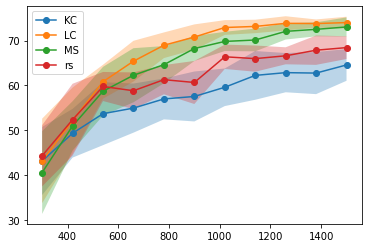

In [ ]:
plt.plot(samples, np.mean(acc_kc, axis = 0), "-o", label = "KC")
plt.fill_between(samples, np.mean(acc_kc, axis = 0)-np.std(acc_kc, axis = 0), np.mean(acc_kc, axis = 0)+np.std(acc_kc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_lc, axis = 0), "-o", label = "LC")
plt.fill_between(samples, np.mean(acc_lc, axis = 0)-np.std(acc_lc, axis = 0), np.mean(acc_lc, axis = 0)+np.std(acc_lc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_ms, axis = 0), "-o", label = "MS")
plt.fill_between(samples, np.mean(acc_ms, axis = 0)-np.std(acc_ms, axis = 0), np.mean(acc_ms, axis = 0)+np.std(acc_ms, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_rs, axis = 0), "-o", label = "RS")
plt.fill_between(samples, np.mean(acc_rs, axis = 0)-np.std(acc_rs, axis = 0), np.mean(acc_rs, axis = 0)+np.std(acc_rs, axis = 0), alpha=0.3)

plt.legend()